In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import utils.clean_utils as cu

### Explore individual datasets


In [89]:
account = pd.read_csv("../data/account.csv", delimiter=";")
card_dev = pd.read_csv("../data/card_dev.csv", delimiter=";")
client = pd.read_csv("../data/client.csv", delimiter=";")
disp = pd.read_csv("../data/disp.csv", delimiter=";")
district = pd.read_csv("../data/district.csv", delimiter=";")
loan_dev = pd.read_csv("../data/loan_dev.csv", delimiter=";")
trans_dev = pd.read_csv("../data/trans_dev.csv", delimiter=";", dtype={"bank": str})

#### District


In [90]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   code                                               77 non-null     int64  
 1   name                                               77 non-null     object 
 2   region                                             77 non-null     object 
 3   no. of inhabitants                                 77 non-null     int64  
 4   no. of municipalities with inhabitants < 499       77 non-null     int64  
 5   no. of municipalities with inhabitants 500-1999    77 non-null     int64  
 6   no. of municipalities with inhabitants 2000-9999   77 non-null     int64  
 7   no. of municipalities with inhabitants >10000      77 non-null     int64  
 8   no. of cities                                      77 non-null     int64  
 9   ratio of urb

Text(0.5, 1.0, "Commited crimes '95/'96")

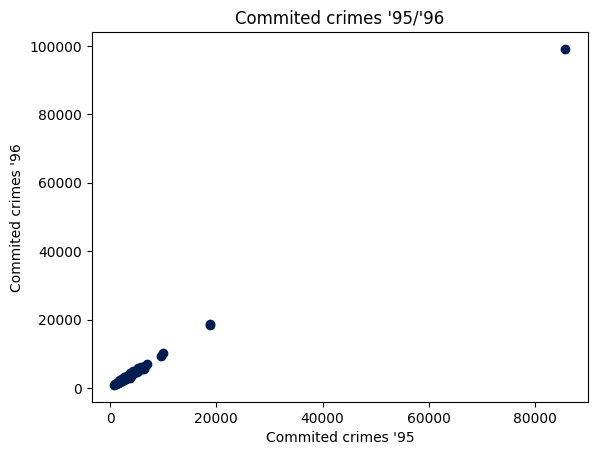

In [91]:
new_district = district.copy()

new_district["no. of commited crimes '95 "] = pd.to_numeric(
    new_district["no. of commited crimes '95 "], errors="coerce"
)
new_district["no. of commited crimes '96 "] = pd.to_numeric(
    new_district["no. of commited crimes '96 "], errors="coerce"
)

plt.scatter(
    new_district["no. of commited crimes '95 "],
    new_district["no. of commited crimes '96 "],
    color="#011C50",
)

plt.xlabel("Commited crimes '95")
plt.ylabel("Commited crimes '96")
plt.title("Commited crimes '95/'96")

Text(0.5, 1.0, "Commited crimes '95/'96")

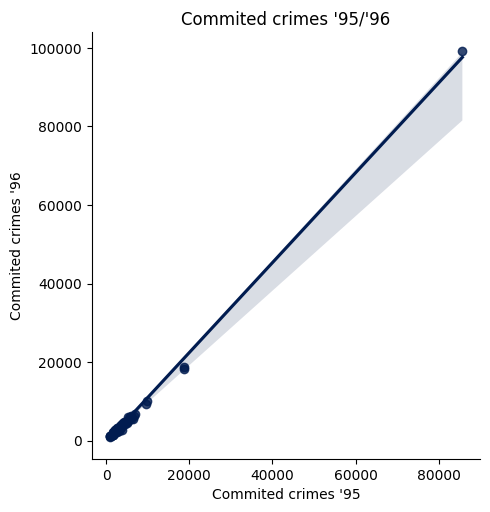

In [92]:
sns.lmplot(
    x="no. of commited crimes '95 ",
    y="no. of commited crimes '96 ",
    data=new_district,
    line_kws={"color": "#011C50"},
    scatter_kws={"color": "#011C50"},
)

plt.xlabel("Commited crimes '95")
plt.ylabel("Commited crimes '96")
plt.title("Commited crimes '95/'96")

Text(0.5, 1.0, "Unemployment rate '95/'96")

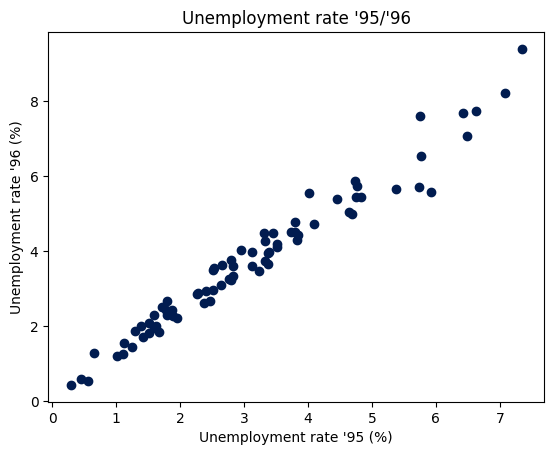

In [93]:
new_district["unemploymant rate '95 "] = pd.to_numeric(
    new_district["unemploymant rate '95 "], errors="coerce"
)
new_district["unemploymant rate '96 "] = pd.to_numeric(
    new_district["unemploymant rate '96 "], errors="coerce"
)

plt.scatter(
    new_district["unemploymant rate '95 "],
    new_district["unemploymant rate '96 "],
    color="#011C50",
)

plt.xlabel("Unemployment rate '95 (%)")
plt.ylabel("Unemployment rate '96 (%)")
plt.title("Unemployment rate '95/'96")

Text(0.5, 1.0, "Unemployment rate '95/'96")

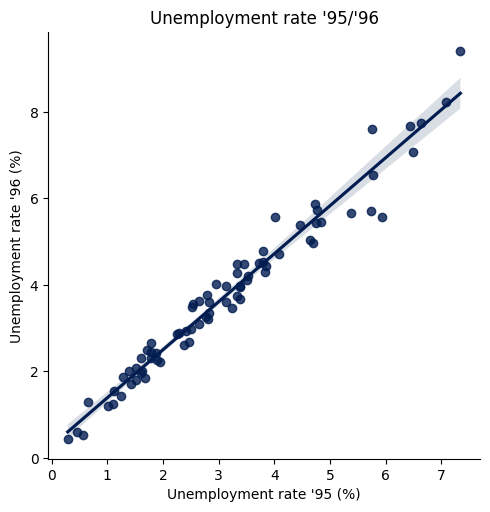

In [94]:
sns.lmplot(
    x="unemploymant rate '95 ",
    y="unemploymant rate '96 ",
    data=new_district,
    line_kws={"color": "#011C50"},
    scatter_kws={"color": "#011C50"},
)

plt.xlabel("Unemployment rate '95 (%)")
plt.ylabel("Unemployment rate '96 (%)")
plt.title("Unemployment rate '95/'96")

#### Transactions


In [95]:
trans_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396685 entries, 0 to 396684
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    396685 non-null  int64  
 1   account_id  396685 non-null  int64  
 2   date        396685 non-null  int64  
 3   type        396685 non-null  object 
 4   operation   325924 non-null  object 
 5   amount      396685 non-null  float64
 6   balance     396685 non-null  float64
 7   k_symbol    211441 non-null  object 
 8   bank        97242 non-null   object 
 9   account     102229 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 30.3+ MB


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/3109490886.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



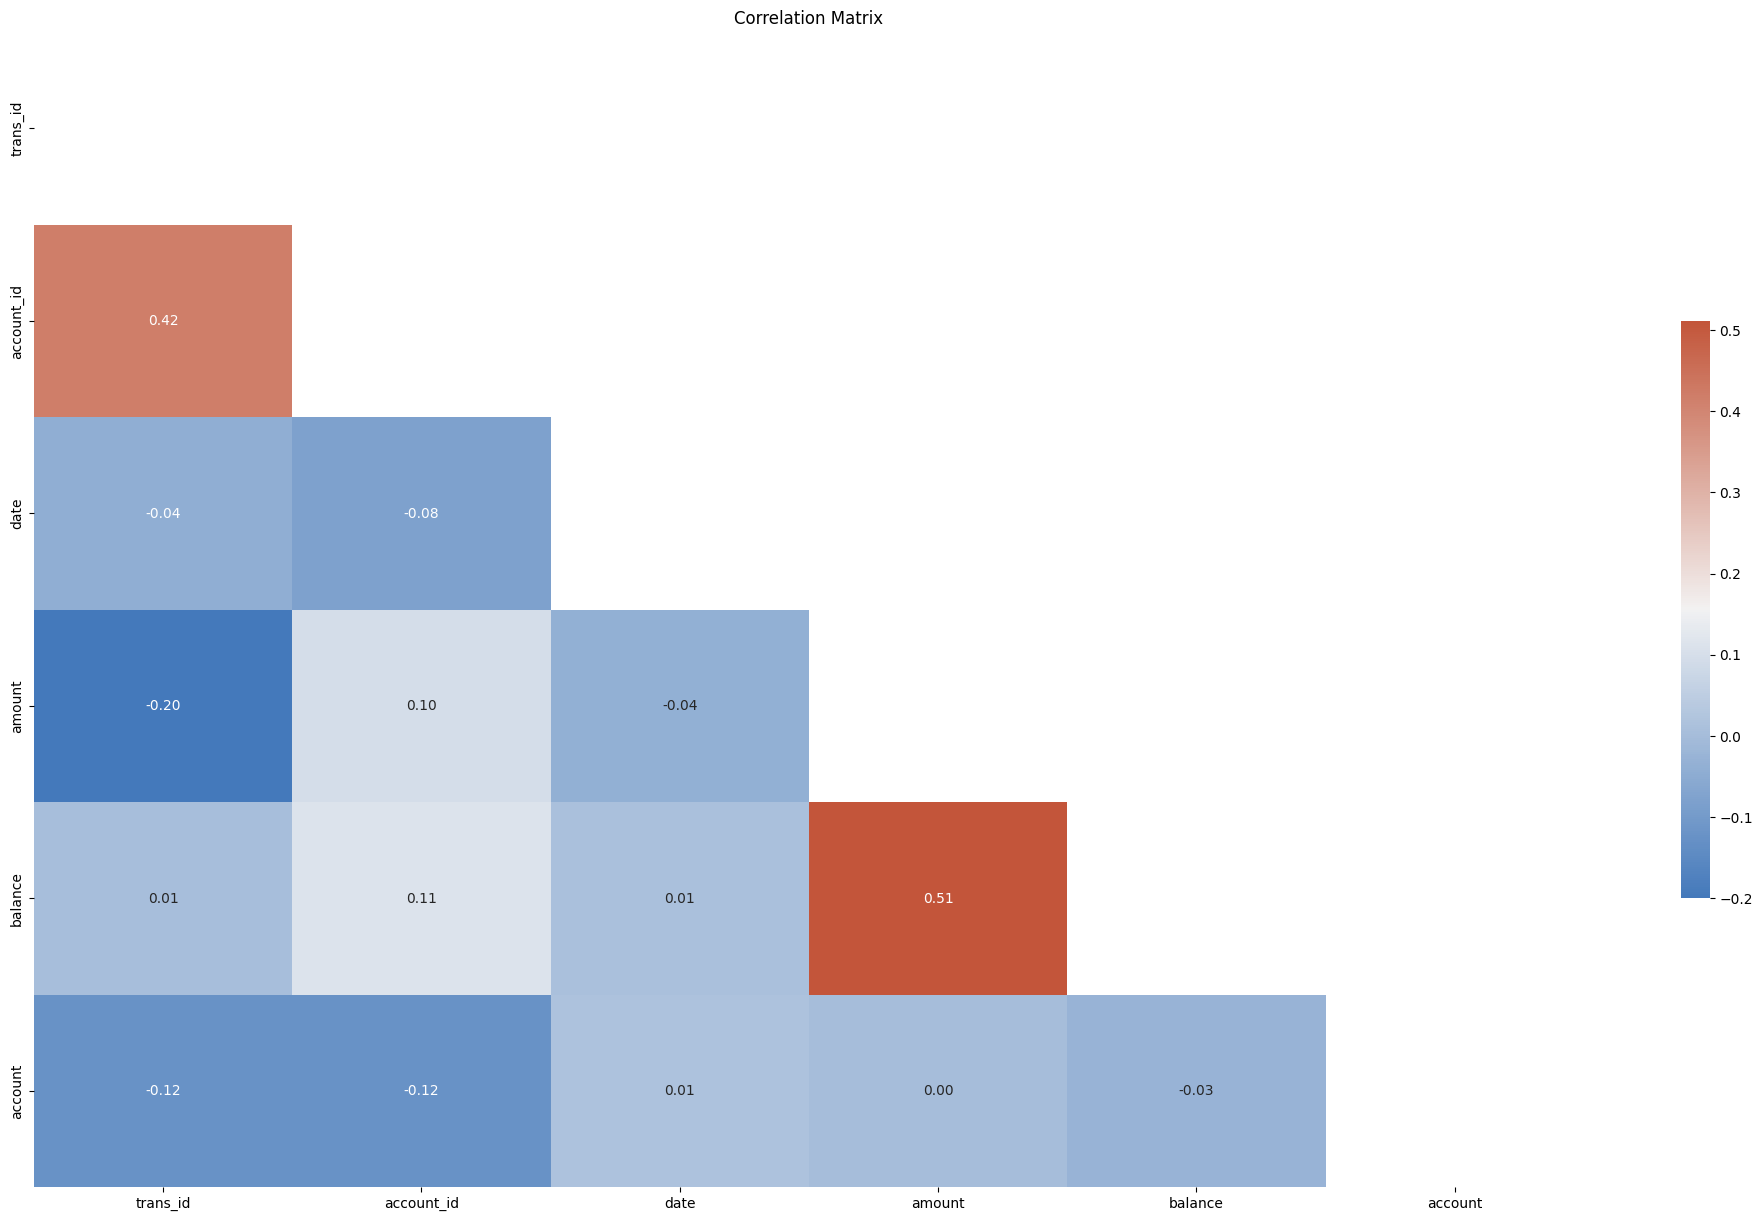

In [96]:
corr = trans_dev.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()

#### Loan


In [97]:
loan_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   loan_id     328 non-null    int64
 1   account_id  328 non-null    int64
 2   date        328 non-null    int64
 3   amount      328 non-null    int64
 4   duration    328 non-null    int64
 5   payments    328 non-null    int64
 6   status      328 non-null    int64
dtypes: int64(7)
memory usage: 18.1 KB


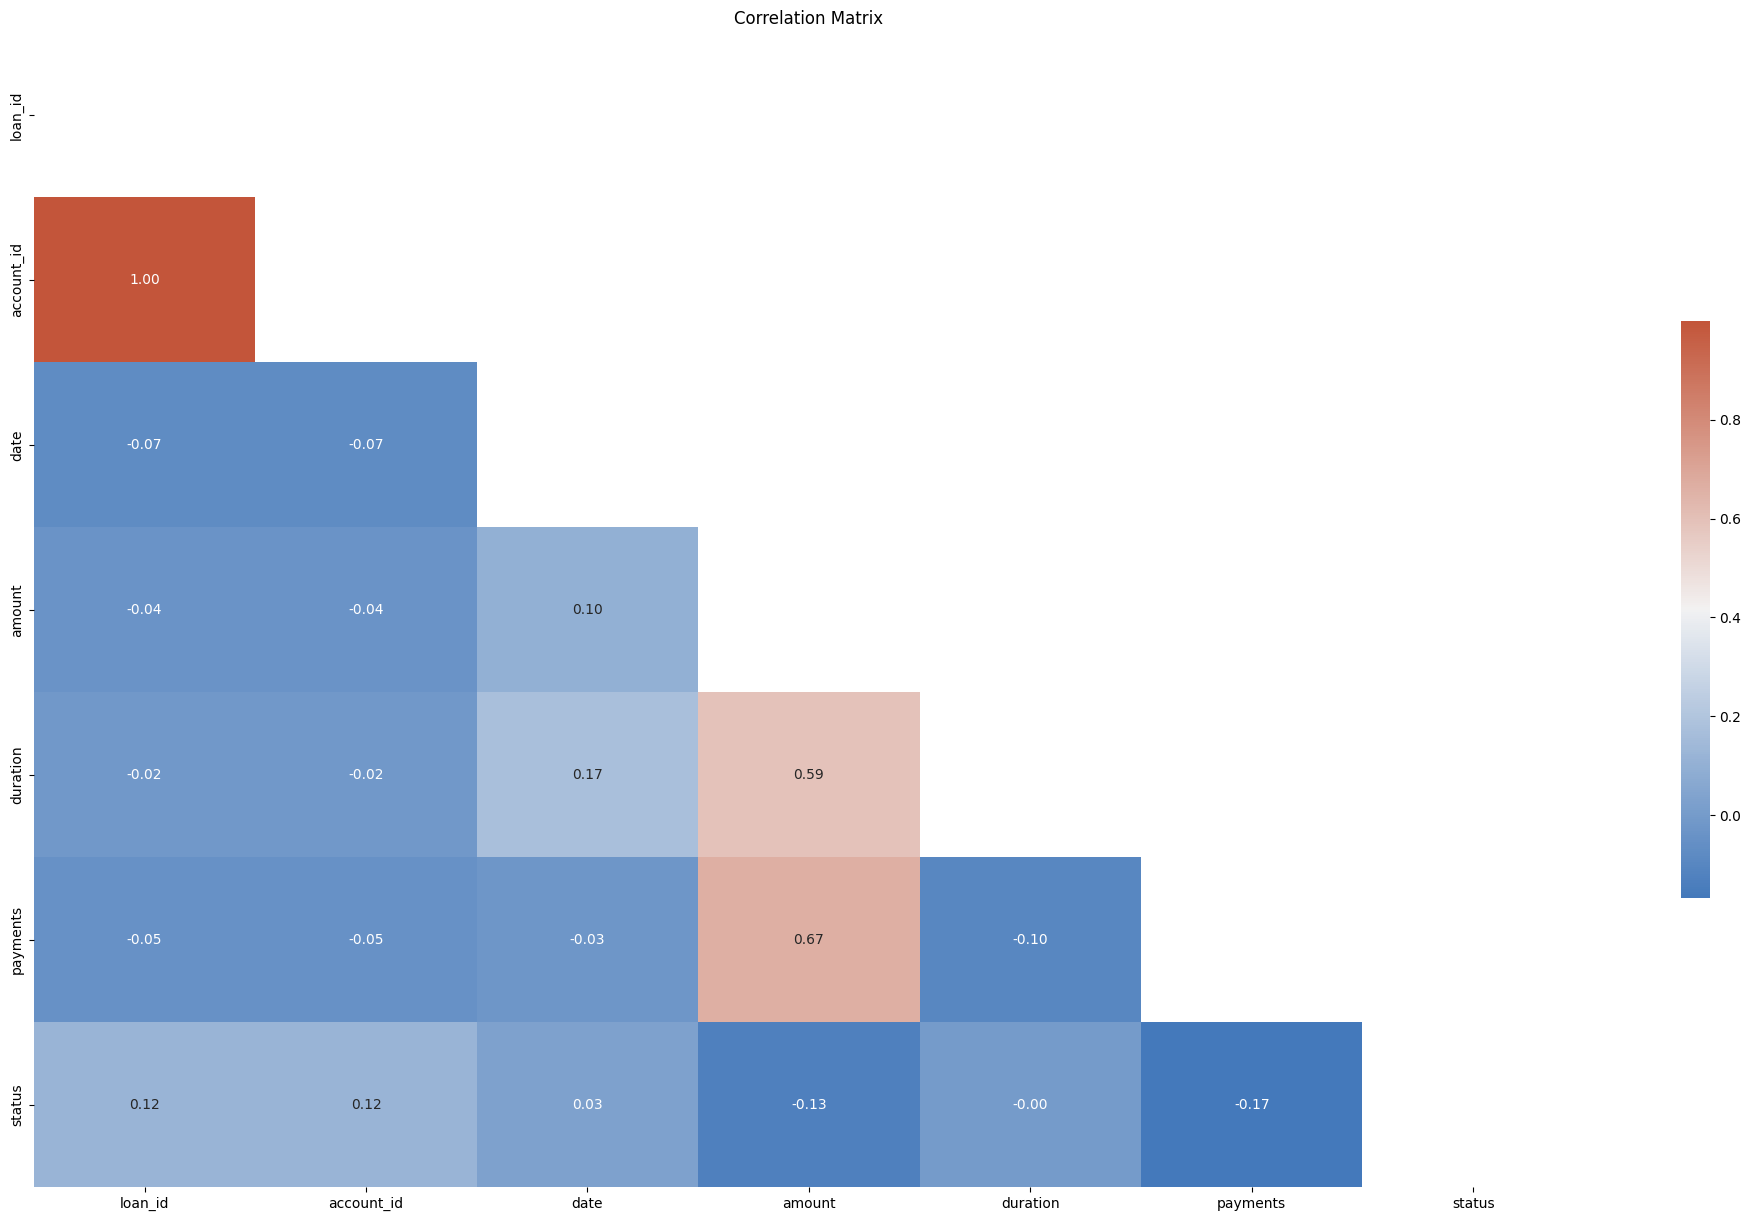

In [98]:
corr = loan_dev.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()


<AxesSubplot: title={'center': 'duration'}, xlabel='status'>

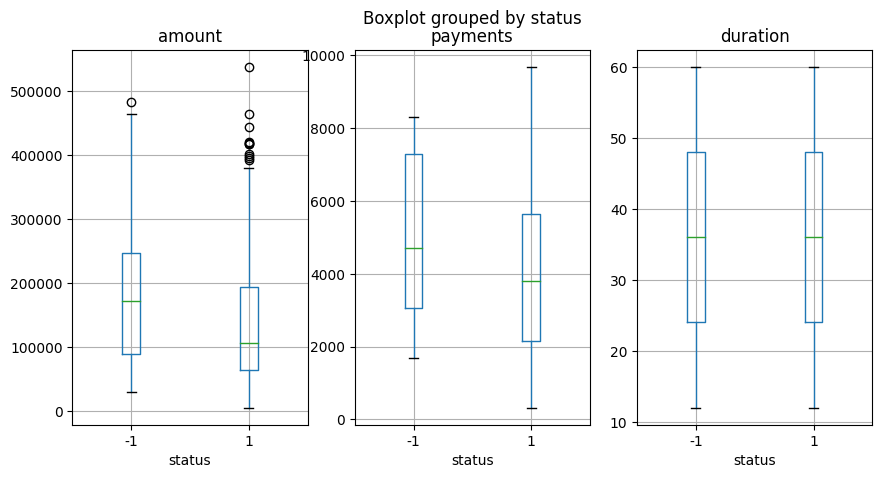

In [99]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

loan_dev.boxplot(column="amount", by="status", figsize=(5, 5), ax=axs[0])
loan_dev.boxplot(column="payments", by="status", figsize=(5, 5), ax=axs[1])
loan_dev.boxplot(column="duration", by="status", figsize=(5, 5), ax=axs[2])


#### Card


In [100]:
card_dev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  177 non-null    int64 
 1   disp_id  177 non-null    int64 
 2   type     177 non-null    object
 3   issued   177 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


Text(0.5, 1.0, 'Count of accounts by type of card')

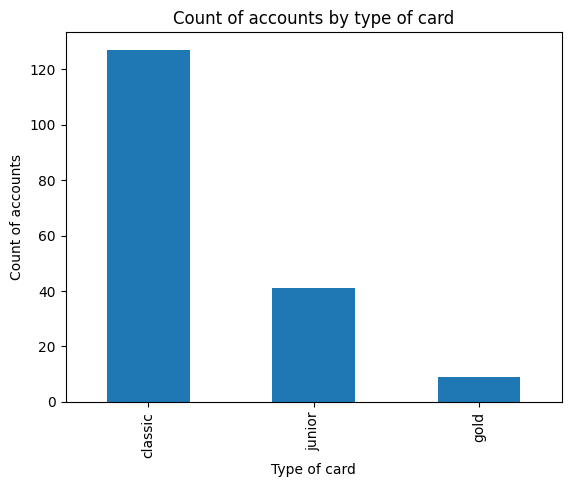

In [105]:
card_dev['type'].value_counts().plot.bar()

plt.xlabel('Type of card')
plt.ylabel('Count of accounts')
plt.title('Count of accounts by type of card')

#### Account


In [106]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


In [107]:
account['frequency'].value_counts()

monthly issuance              4167
weekly issuance                240
issuance after transaction      93
Name: frequency, dtype: int64

### Disponent

In [ ]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   disp_id        4500 non-null   int64
 1   client_id      4500 non-null   int64
 2   account_id     4500 non-null   int64
 3   has_disponent  4500 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 145.0 KB


Text(0.5, 1.0, 'Count of accounts by disponents')

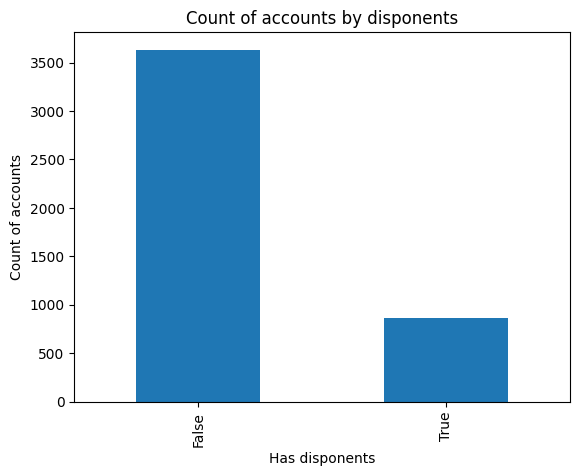

In [116]:
disp['has_disponent'].value_counts().plot.bar()

plt.xlabel('Has disponents')
plt.ylabel('Count of accounts')
plt.title('Count of accounts by disponents')

### Explore training dataset


In [111]:
account = cu.clean_accounts(account, clean=False)
disp = cu.clean_disp(disp, clean=False)
client = cu.clean_clients(client, clean=False)
district = cu.clean_districts(district, clean=False)
card_dev = cu.clean_cards(card_dev, disp, clean=False)
loan_dev = cu.clean_loans(loan_dev)
trans_dev = cu.clean_transactions(trans_dev, clean=False, op=True, k_symbol=True)

df = pd.read_csv("../data/clean/df-exploratory.csv")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   loan_id                                           328 non-null    int64  
 1   account_id                                        328 non-null    int64  
 2   loan_date                                         328 non-null    object 
 3   amount                                            328 non-null    int64  
 4   duration                                          328 non-null    int64  
 5   payments                                          328 non-null    int64  
 6   status                                            328 non-null    int64  
 7   account_district_id                               328 non-null    int64  
 8   frequency                                         328 non-null    object 
 9   creation_date        

Text(0.5, 1.0, 'Status count for bank loans')

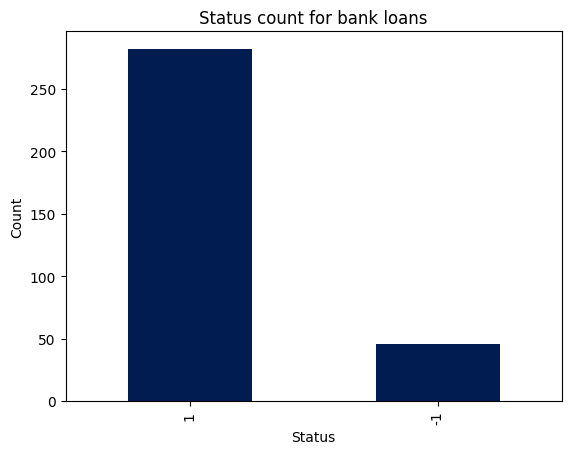

In [ ]:
df["status"].value_counts().plot.bar(color="#011C50")
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status count for bank loans")


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/322572605.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


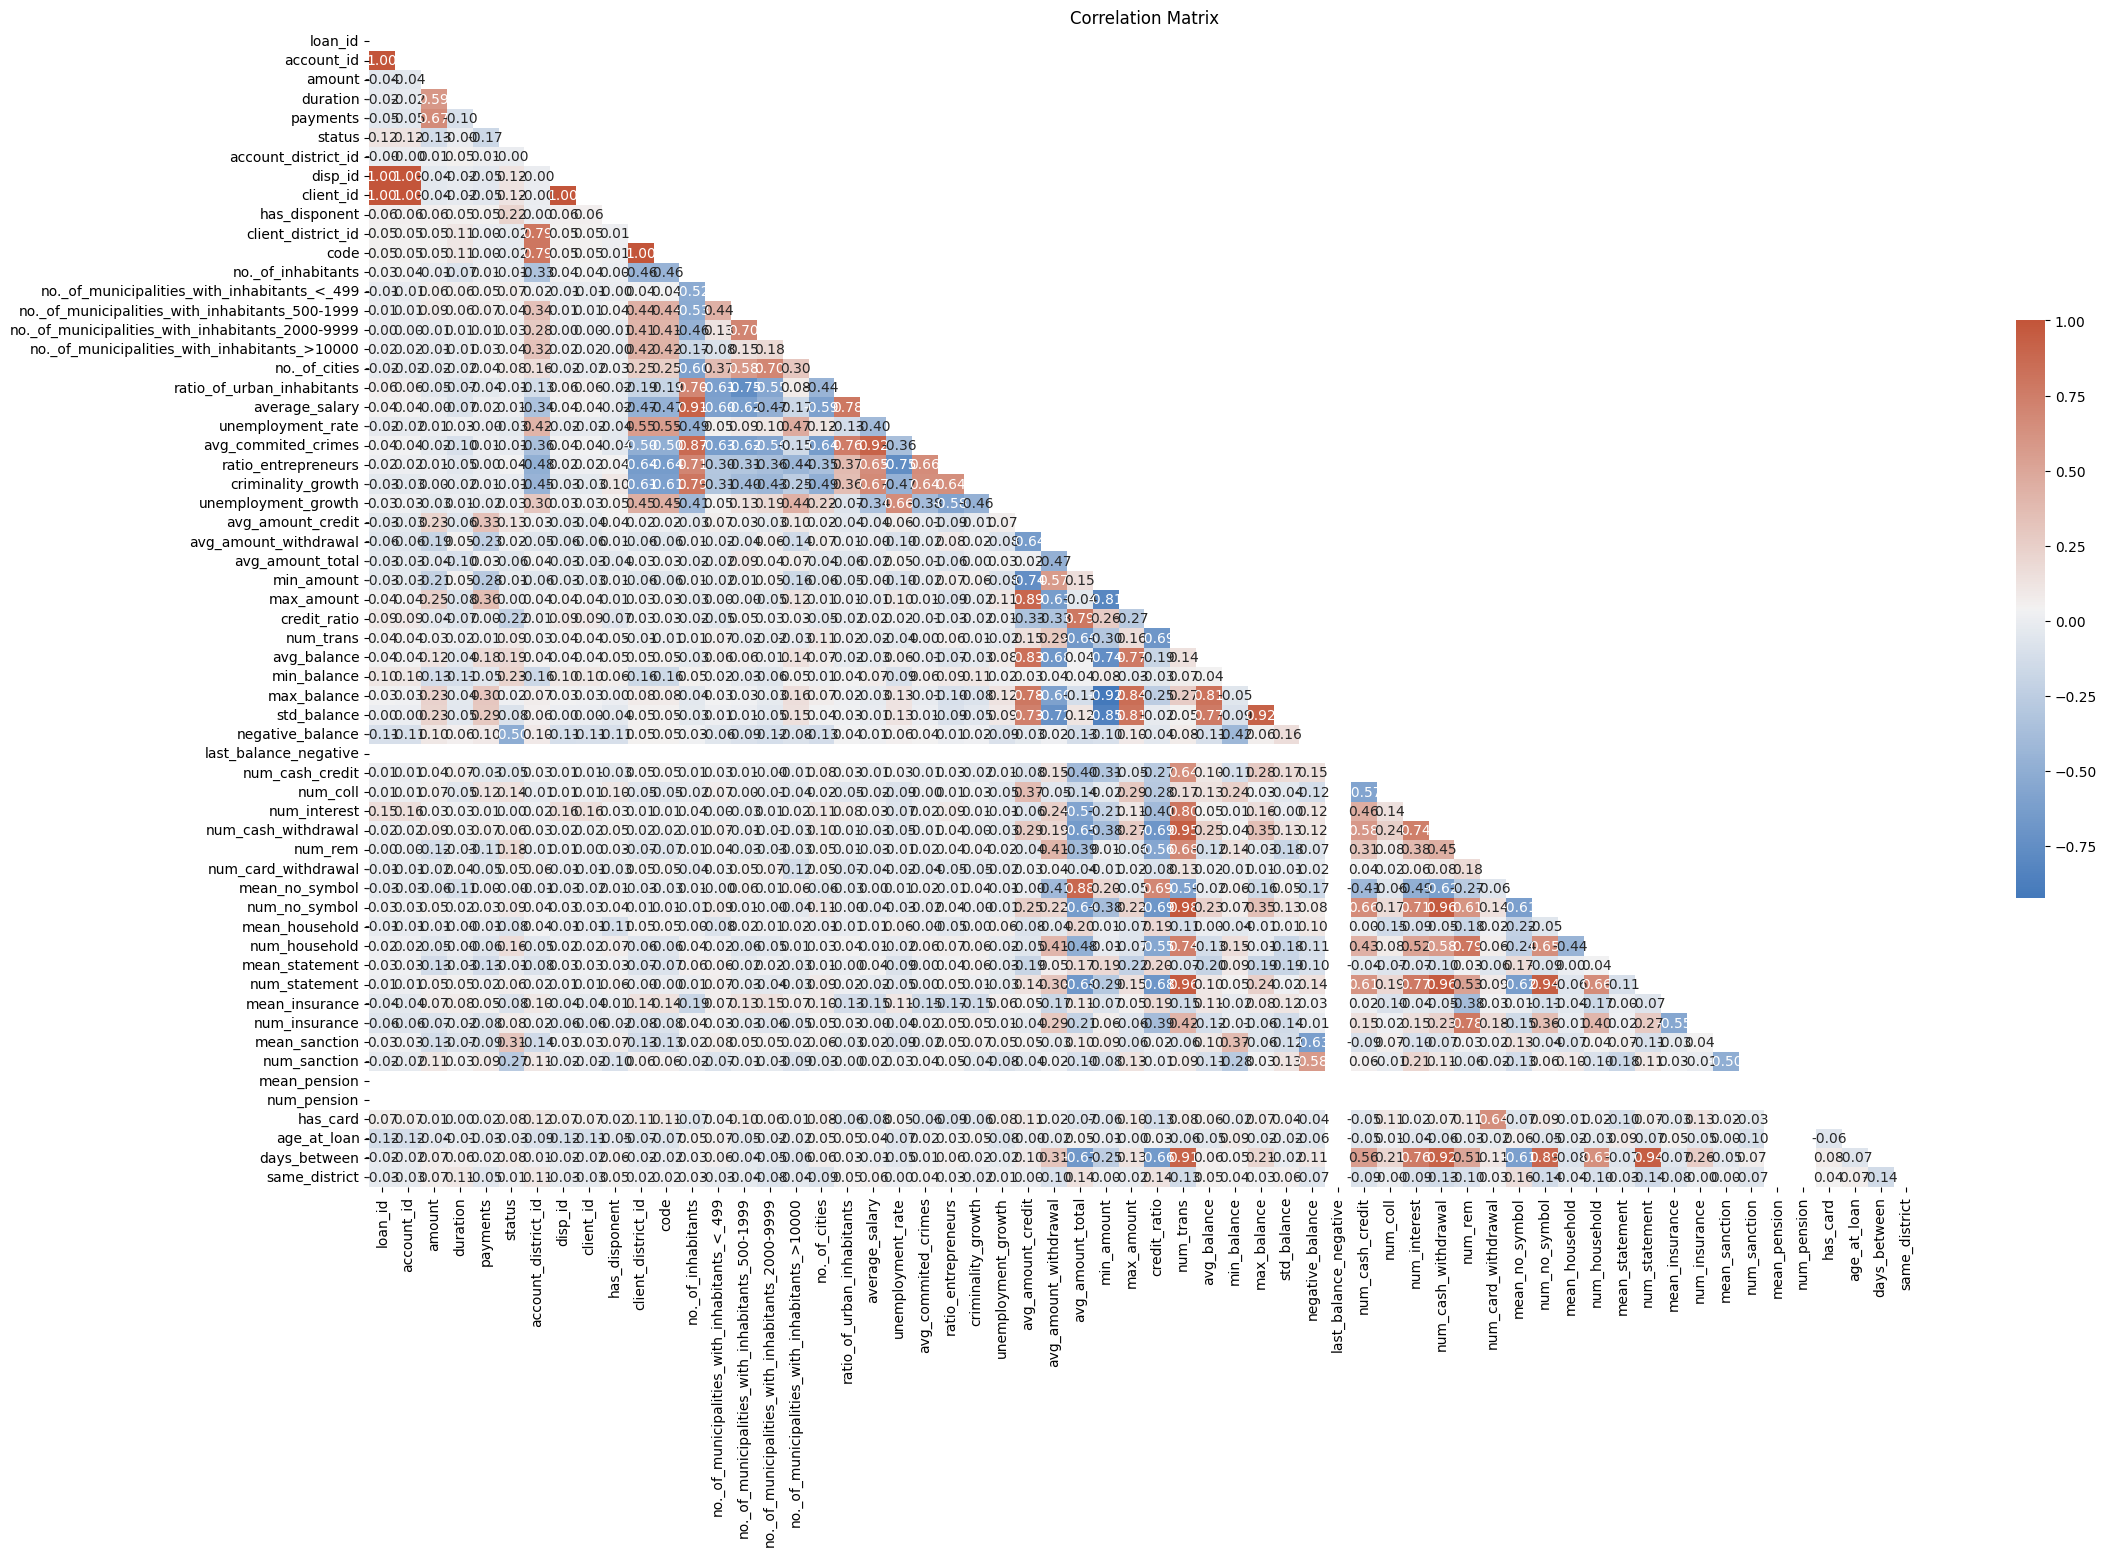

In [ ]:
# correlation analysis

corr = df.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()


In [115]:
df.columns

Index(['loan_id', 'account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'account_district_id', 'frequency', 'creation_date',
       'disp_id', 'client_id', 'has_disponent', 'client_district_id', 'gender',
       'birth_date', 'code', 'region', 'no._of_inhabitants',
       'no._of_municipalities_with_inhabitants_<_499',
       'no._of_municipalities_with_inhabitants_500-1999',
       'no._of_municipalities_with_inhabitants_2000-9999',
       'no._of_municipalities_with_inhabitants_>10000', 'no._of_cities',
       'ratio_of_urban_inhabitants', 'average_salary', 'unemployment_rate',
       'avg_commited_crimes', 'ratio_entrepreneurs', 'criminality_growth',
       'unemployment_growth', 'avg_amount_credit', 'avg_amount_withdrawal',
       'avg_amount_total', 'min_amount', 'max_amount', 'credit_ratio',
       'num_trans', 'avg_balance', 'min_balance', 'max_balance', 'std_balance',
       'negative_balance', 'last_balance_negative', 'num_cash_credit',
       'num_coll

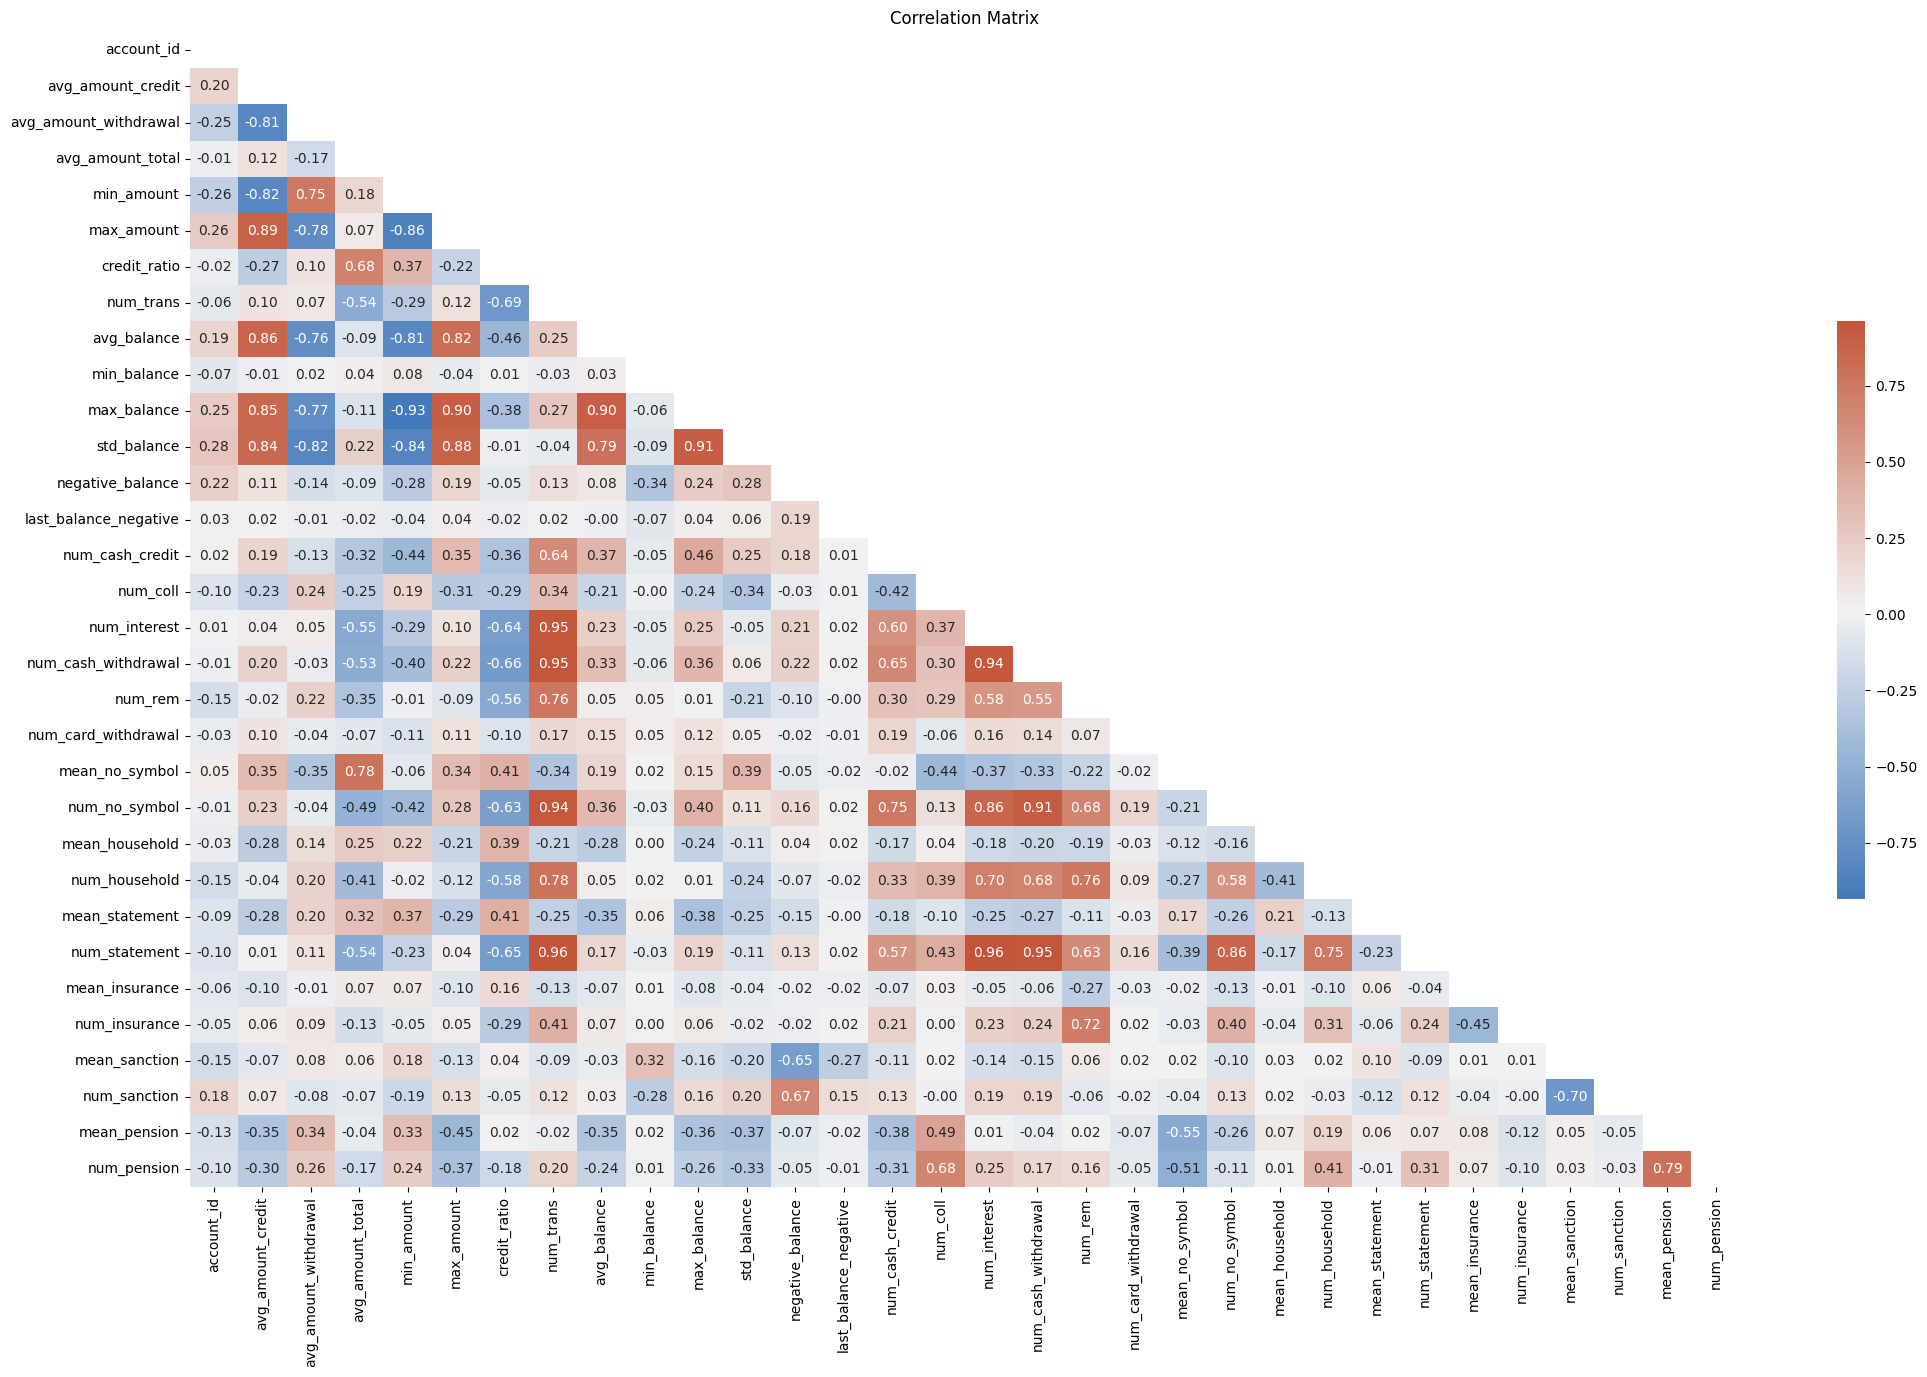

In [ ]:
# correlation analysis
corr = trans_dev.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/1813791448.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_dev.corr()


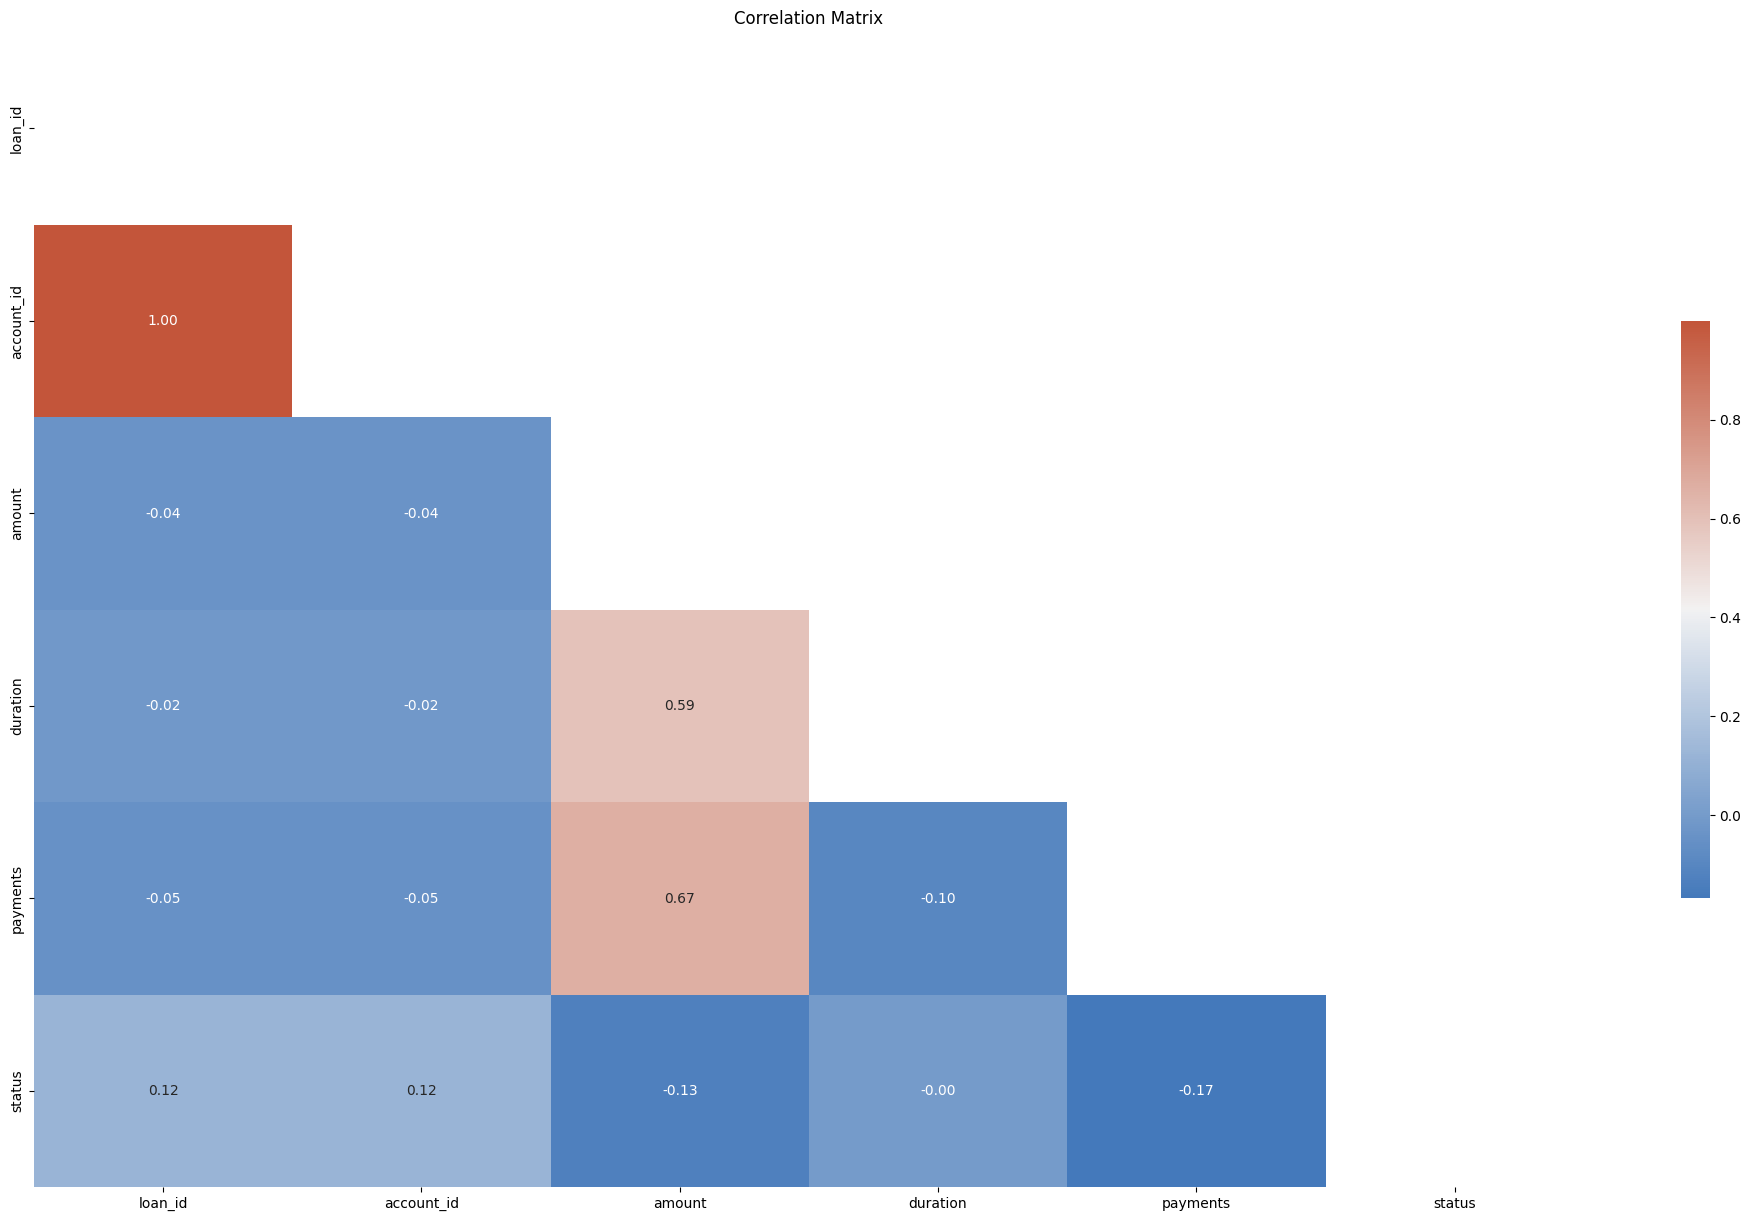

In [ ]:
# correlation analysis

corr = loan_dev.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/2756609607.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = district.corr()


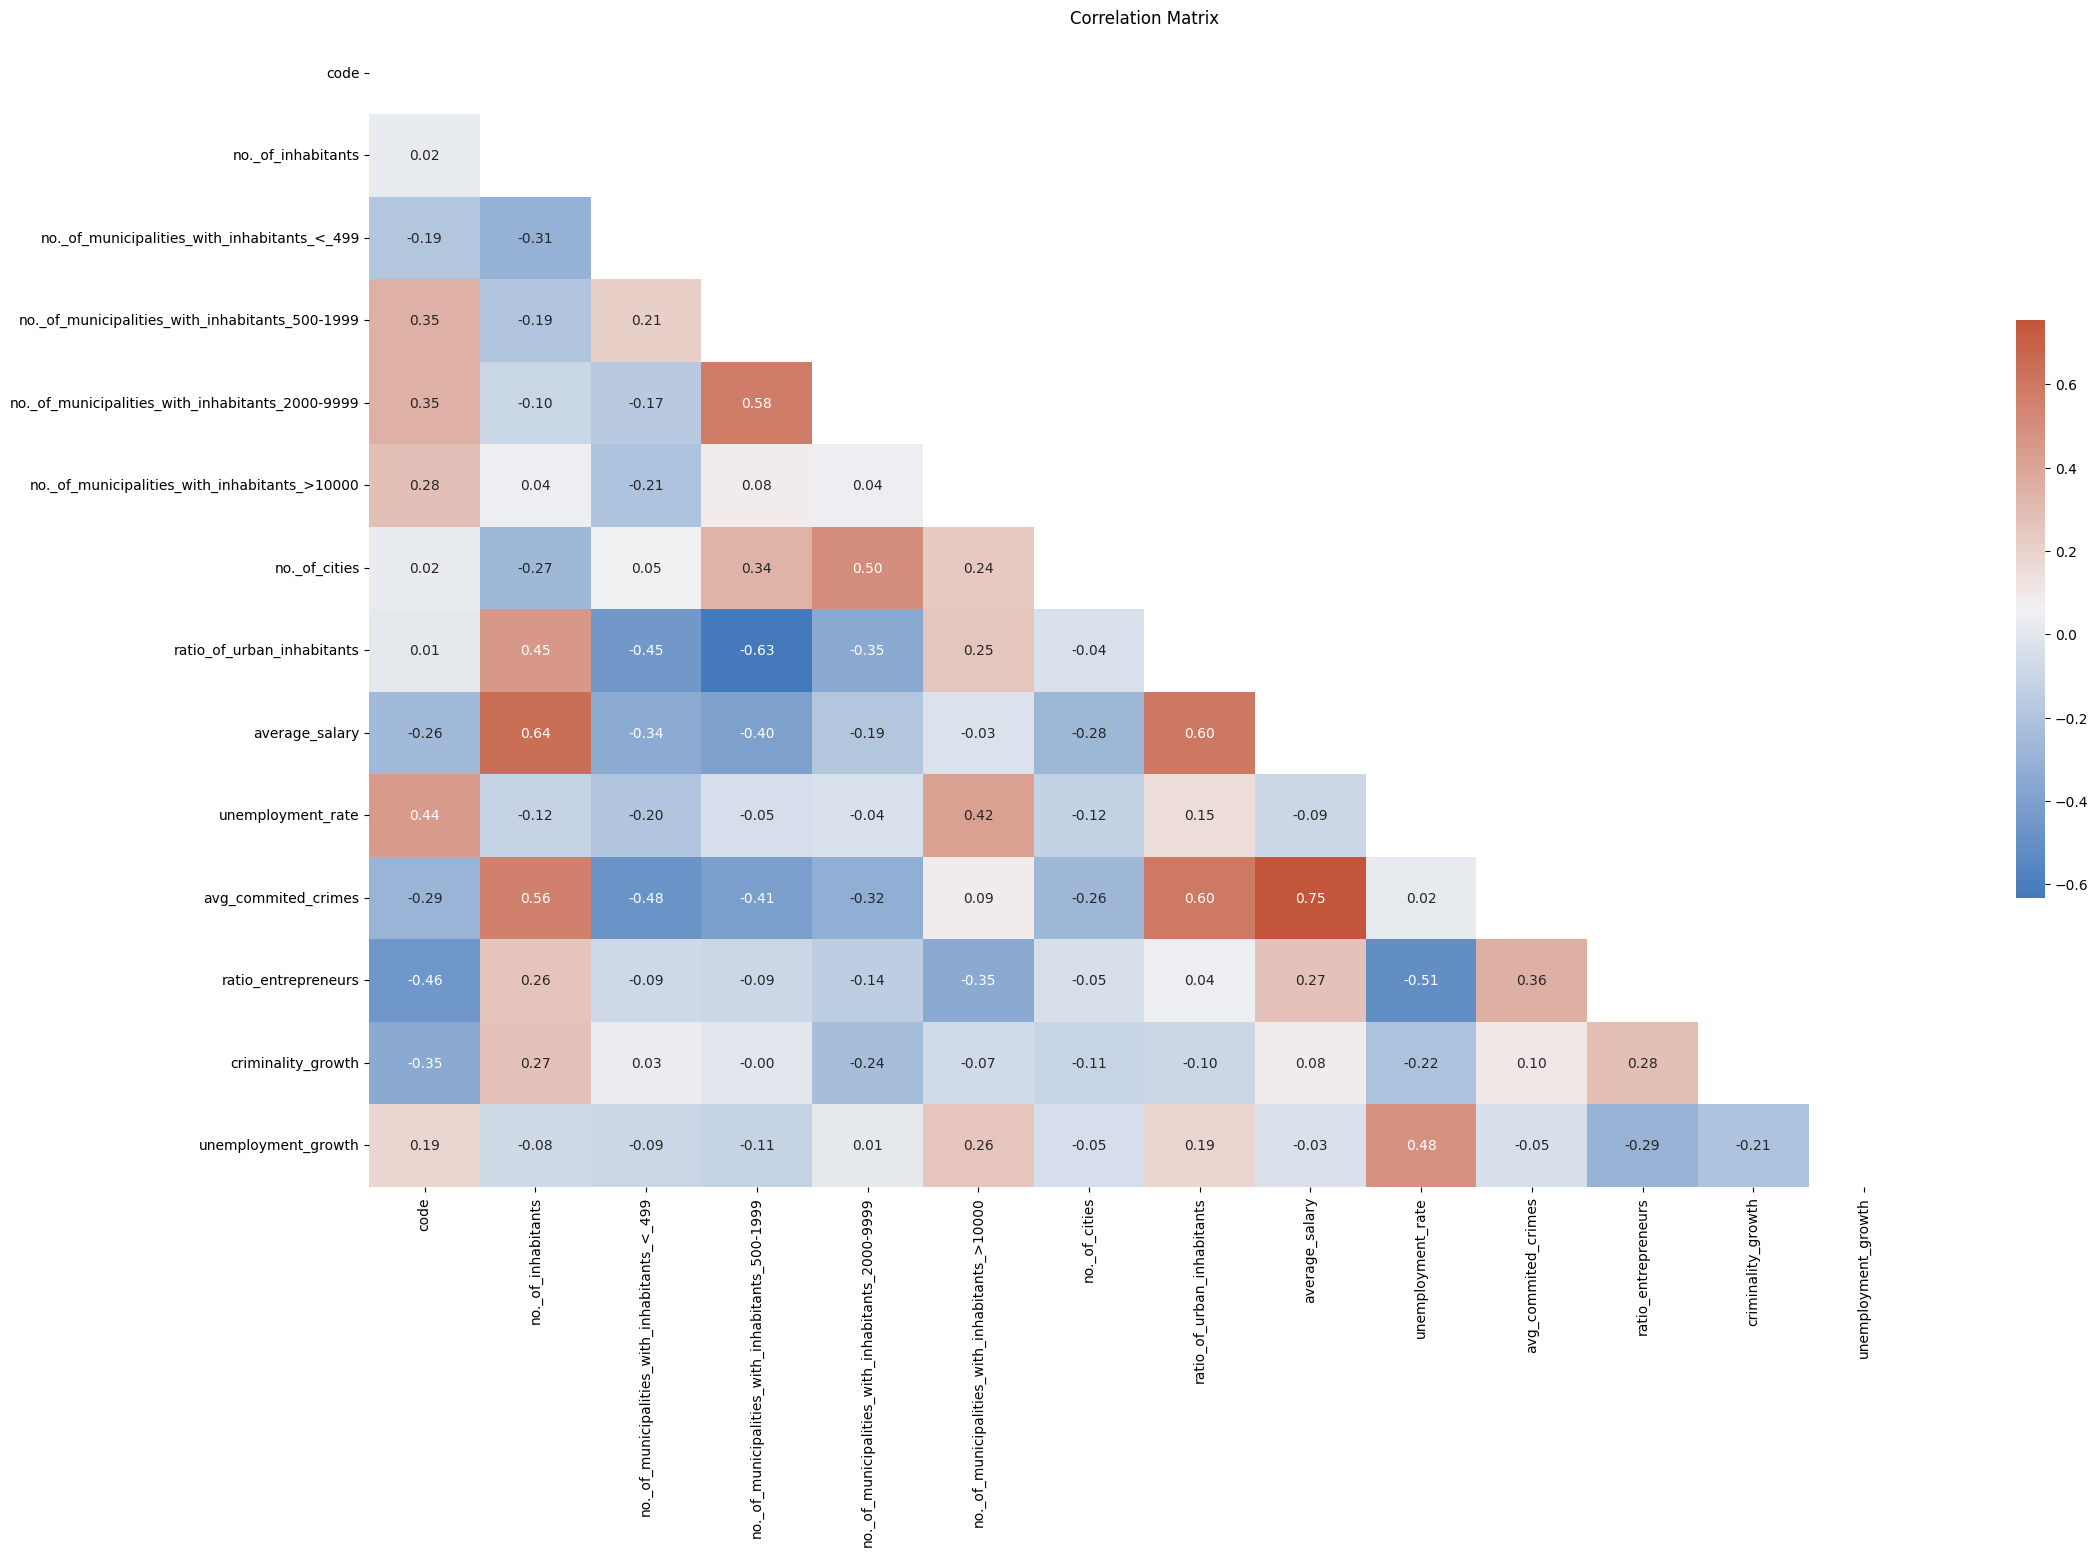

In [ ]:
# correlation analysis

corr = district.corr()
mask = np.triu(corr)

fig = plt.figure(figsize=(25, 15))

colormap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(
    corr, annot=True, fmt=".2f", cbar_kws={"shrink": 0.5}, mask=mask, cmap=colormap
).set(title="Correlation Matrix")

plt.show()


In [ ]:
print("STATISTICS FOR SOME OF THE RELEVANT NUMERICAL FEATURES")

# most of the columns, such as the ones with IDs, are irrelevant for this type of analysis
relevant_cols = [
    "amount",
    "duration",
    "payments",
    "average_salary",
    "unemployment_growth",
    "avg_commited_crimes",
    "ratio_entrepreneurs",
    "avg_amount_credit",
    "avg_amount_withdrawal",
    "avg_amount_total",
    "min_amount",
    "max_amount",
    "credit_ratio",
    "num_trans",
    "avg_balance",
    "min_balance",
    "max_balance",
    "std_balance",
    "num_cash_credit",
    "num_coll",
    "num_interest",
    "num_cash_withdrawal",
    "num_rem",
    "num_card_withdrawal",
    "mean_no_symbol",
    "num_no_symbol",
    "mean_household",
    "num_household",
    "mean_statement",
    "num_statement",
    "mean_insurance",
    "num_insurance",
    "mean_sanction",
    "num_sanction",
    "mean_pension",
    "num_pension",
    "age_at_loan",
    "days_between",
]

status_positive = df[df["status"] == 1]
status_negative = df[df["status"] == -1]

df[relevant_cols].describe()


STATISTICS FOR SOME OF THE RELEVANT NUMERICAL FEATURES


,amount,duration,payments,average_salary,unemployment_growth,avg_commited_crimes,ratio_entrepreneurs,avg_amount_credit,avg_amount_withdrawal,avg_amount_total,...,mean_statement,num_statement,mean_insurance,num_insurance,mean_sanction,num_sanction,mean_pension,num_pension,age_at_loan,days_between
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.0,328.000000,328.000000
mean,145308.621951,35.853659,4150.932927,9523.149390,0.603659,0.036100,0.121442,11886.019407,-8321.769563,985.387137,...,-19.053659,7.707317,-259.716463,1.277439,-0.199512,0.115854,0.0,0.0,35.774390,374.036585
std,105247.318098,16.734752,2193.620989,1319.525148,0.398913,0.018416,0.023280,5380.920995,4430.184855,1093.439740,...,19.907770,5.431785,1063.269769,3.754611,1.527346,0.662674,0.0,0.0,12.530733,163.687567
min,4980.000000,12.000000,319.000000,8110.000000,-0.360000,0.014744,0.081000,2590.102941,-29640.857143,24.226174,...,-100.000000,0.000000,-9115.000000,0.000000,-20.033333,0.000000,0.0,0.0,13.000000,105.000000
25%,68328.000000,24.000000,2368.750000,8546.250000,0.290000,0.022194,0.107000,7720.723579,-10933.009790,318.763141,...,-14.600000,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,25.000000,238.500000
50%,114804.000000,36.000000,3878.500000,8994.000000,0.580000,0.031353,0.115000,11504.724444,-7693.052912,528.113628,...,-14.600000,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,35.000000,365.500000
75%,198600.000000,48.000000,5907.750000,9897.000000,0.780000,0.042703,0.135000,15922.043683,-5119.647812,1179.639270,...,-14.600000,12.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,46.000000,503.250000
max,538500.000000,60.000000,9689.000000,12541.000000,2.060000,0.076677,0.167000,26907.226923,0.000000,5609.156250,...,0.000000,22.000000,0.000000,19.000000,0.000000,6.000000,0.0,0.0,60.000000,696.000000


In [ ]:
status_positive[relevant_cols].describe()


,amount,duration,payments,average_salary,unemployment_growth,avg_commited_crimes,ratio_entrepreneurs,avg_amount_credit,avg_amount_withdrawal,avg_amount_total,...,mean_statement,num_statement,mean_insurance,num_insurance,mean_sanction,num_sanction,mean_pension,num_pension,age_at_loan,days_between
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.0,282.000000,282.000000
mean,139865.914894,35.829787,4001.932624,9530.166667,0.608440,0.036027,0.121784,12161.591391,-8278.155136,960.496458,...,-19.165248,7.847518,-296.031915,1.397163,-0.005556,0.042553,0.0,0.0,35.634752,379.237589
std,103692.396883,16.878868,2153.345360,1314.350269,0.395811,0.018399,0.023267,5468.283156,4434.726575,1042.354304,...,19.271857,5.367771,1140.627671,3.901600,0.077454,0.504391,0.0,0.0,12.295499,161.812917
min,4980.000000,12.000000,319.000000,8110.000000,-0.360000,0.014744,0.081000,2590.102941,-29640.857143,24.226174,...,-100.000000,0.000000,-9115.000000,0.000000,-1.266667,0.000000,0.0,0.0,13.000000,105.000000
25%,63324.000000,24.000000,2142.500000,8547.000000,0.300000,0.022030,0.107000,7939.658288,-10978.786998,342.905153,...,-14.600000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,25.000000,244.250000
50%,106722.000000,36.000000,3802.500000,8994.000000,0.580000,0.031669,0.115000,11504.724444,-7575.266667,537.106597,...,-14.600000,7.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,35.000000,366.500000
75%,193662.000000,48.000000,5628.750000,9914.250000,0.780000,0.042096,0.135000,16456.200641,-5006.392130,1071.155857,...,-14.600000,12.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,46.000000,517.500000
max,538500.000000,60.000000,9689.000000,12541.000000,2.060000,0.076677,0.167000,26907.226923,-1031.006349,5609.156250,...,0.000000,22.000000,0.000000,19.000000,0.000000,6.000000,0.0,0.0,60.000000,696.000000


In [ ]:
status_negative[relevant_cols].describe()


,amount,duration,payments,average_salary,unemployment_growth,avg_commited_crimes,ratio_entrepreneurs,avg_amount_credit,avg_amount_withdrawal,avg_amount_total,...,mean_statement,num_statement,mean_insurance,num_insurance,mean_sanction,num_sanction,mean_pension,num_pension,age_at_loan,days_between
count,46.000000,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.000000,46.000000
mean,178674.782609,36.0,5064.369565,9480.130435,0.574348,0.036545,0.119348,10196.643330,-8589.144962,1137.977820,...,-18.369565,6.847826,-37.086957,0.543478,-1.388551,0.565217,0.0,0.0,36.630435,342.152174
std,109673.150761,16.0,2240.564288,1364.826039,0.420759,0.018720,0.023502,4503.985987,4441.426667,1369.603745,...,23.667473,5.796426,179.241591,2.596635,3.902967,1.167184,0.0,0.0,14.003743,173.178131
min,29448.000000,12.0,1671.000000,8110.000000,-0.020000,0.017340,0.081000,3691.823810,-22066.666667,58.736441,...,-100.000000,0.000000,-1017.000000,0.000000,-20.033333,0.000000,0.0,0.0,15.000000,105.000000
25%,89511.000000,24.0,3050.500000,8469.750000,0.245000,0.022506,0.106000,6097.160962,-10522.926744,165.311071,...,-14.600000,0.500000,0.000000,0.000000,-0.075000,0.000000,0.0,0.0,24.500000,173.250000
50%,171864.000000,36.0,4701.000000,8991.000000,0.545000,0.030170,0.114000,10308.115863,-8291.164173,461.984574,...,-14.600000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,37.000000,335.000000
75%,246600.000000,48.0,7281.000000,9896.000000,0.780000,0.042703,0.125500,13736.467935,-5609.050000,1618.825691,...,-3.650000,11.000000,0.000000,0.000000,0.000000,0.750000,0.0,0.0,48.000000,470.750000
max,482940.000000,60.0,8308.000000,12541.000000,2.060000,0.076677,0.167000,18483.857692,0.000000,5025.000000,...,0.000000,20.000000,0.000000,14.000000,0.000000,5.000000,0.0,0.0,60.000000,693.000000


In [ ]:
print("STATISTICS FOR THE NON-NUMERICAL FEATURES")

df.describe(include=["object"])


STATISTICS FOR THE NON-NUMERICAL FEATURES


,loan_date,frequency,creation_date,gender,birth_date,region
count,328,328,328,328,328,328
unique,283,3,286,2,318,8
top,1994-12-21,monthly issuance,1993-11-26,male,1945-01-26,south Moravia
freq,3,259,4,166,2,68


Text(0.5, 1.0, 'Status count by number of account disponents')

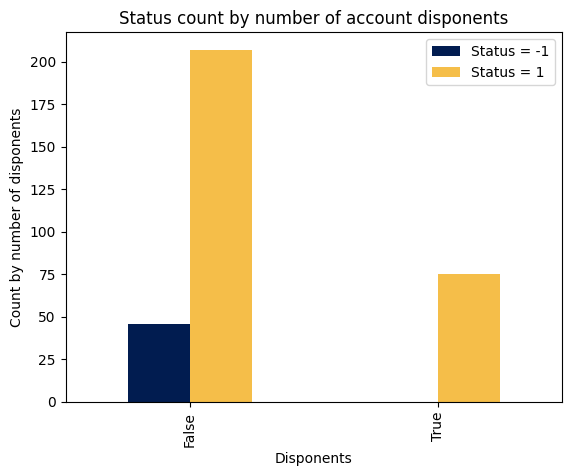

In [ ]:
df.groupby("has_disponent")["status"].value_counts().unstack(1).plot.bar(
    color=["#011C50", "#F5BE49"]
)

plt.xlabel("Disponents")
plt.ylabel("Count by number of disponents")
plt.legend(["Status = -1", "Status = 1"])
plt.title("Status count by number of account disponents")


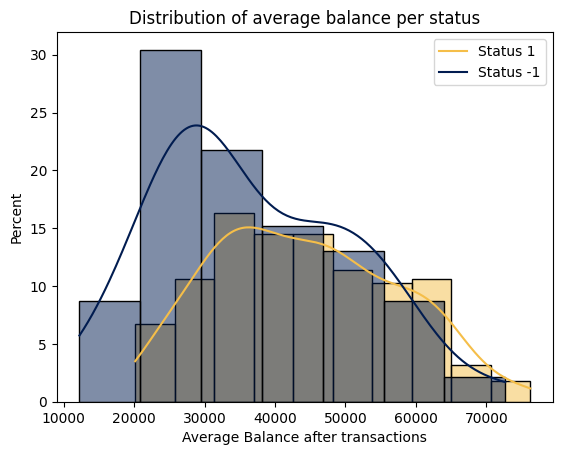

In [ ]:
sns.histplot(
    data=df[df["status"] == 1],
    x="avg_balance",
    color="#F5BE49",
    stat="percent",
    kde=True,
)
sns.histplot(
    data=df[df["status"] == -1],
    x="avg_balance",
    color="#011C50",
    stat="percent",
    kde=True,
)

plt.xlabel("Average Balance after transactions")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of average balance per status")
plt.show()


In [ ]:
fig = px.parallel_categories(
    df,
    dimensions=["gender", "has_card", "negative_balance", "has_disponent", "frequency"],
    color="status",
)

fig.layout["coloraxis"]["colorbar"]["x"] = 1.1
fig.show()


/Users/beatrizag__/.pyenv/versions/3.10.8/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/4266439347.py:29: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



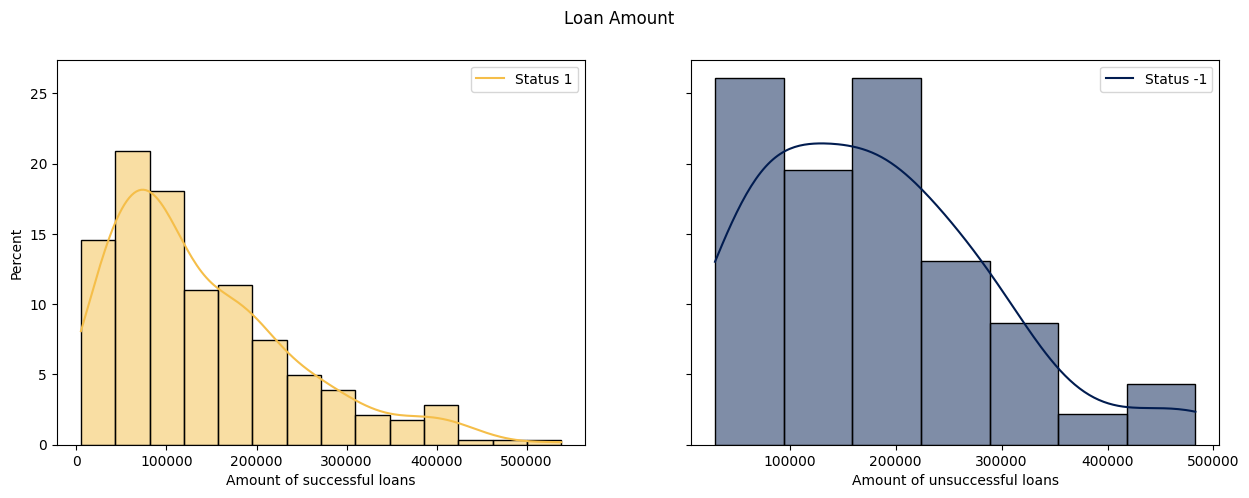

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

# commited crimes
sns.histplot(
    data=df[df["status"] == 1],
    x="amount",
    color="#F5BE49",
    kde=True,
    stat="percent",
    ax=axs[0],
)

# unemplyment rate
sns.histplot(
    data=df[df["status"] == -1],
    x="amount",
    color="#011C50",
    stat="percent",
    kde=True,
    ax=axs[1],
)

axs[0].set_xlabel("Amount of successful loans")
axs[1].set_xlabel("Amount of unsuccessful loans")
axs[0].legend(["Status 1"])
axs[1].legend(["Status -1"])

fig.suptitle("Loan Amount")
fig.show()


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/2565628794.py:29: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



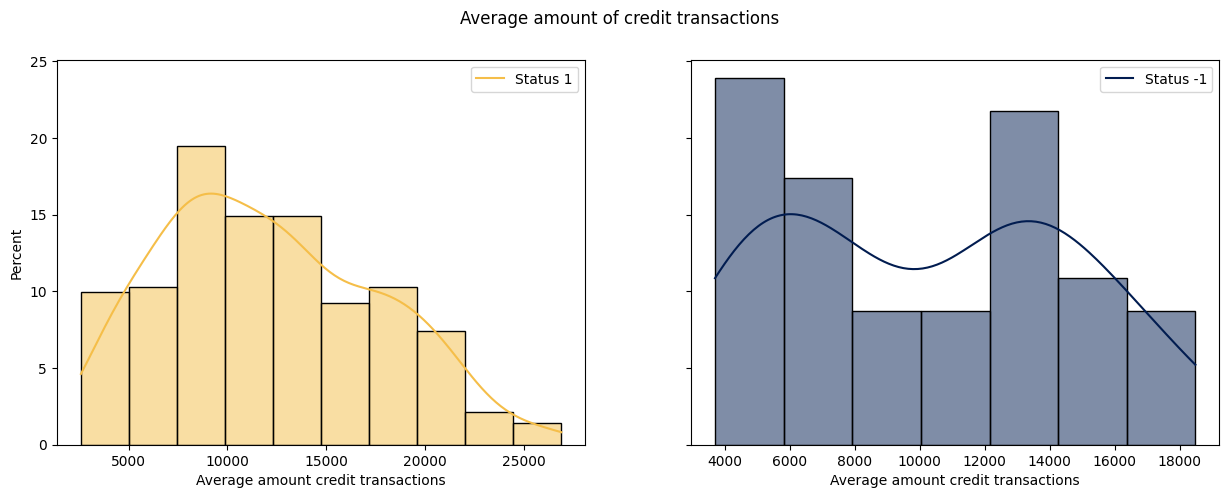

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

# commited crimes
sns.histplot(
    data=df[df["status"] == 1],
    x="avg_amount_credit",
    color="#F5BE49",
    kde=True,
    stat="percent",
    ax=axs[0],
)

# unemplyment rate
sns.histplot(
    data=df[df["status"] == -1],
    x="avg_amount_credit",
    color="#011C50",
    stat="percent",
    kde=True,
    ax=axs[1],
)

axs[0].set_xlabel("Average amount credit transactions")
axs[1].set_xlabel("Average amount credit transactions")
axs[0].legend(["Status 1"])
axs[1].legend(["Status -1"])

fig.suptitle("Average amount of credit transactions")
fig.show()


/var/folders/04/05jdn06x4bd37twbh8c046nr0000gn/T/ipykernel_6603/3210805192.py:30: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



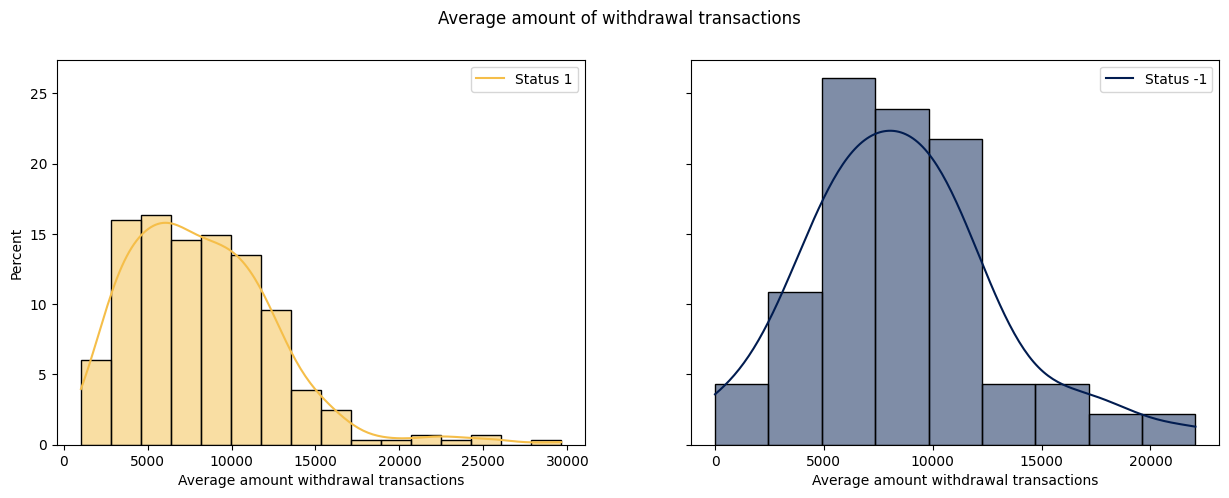

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)
df["avg_amount_withdrawal"] = df["avg_amount_withdrawal"] * -1

# commited crimes
sns.histplot(
    data=df[df["status"] == 1],
    x="avg_amount_withdrawal",
    color="#F5BE49",
    kde=True,
    stat="percent",
    ax=axs[0],
)

# unemplyment rate
sns.histplot(
    data=df[df["status"] == -1],
    x="avg_amount_withdrawal",
    color="#011C50",
    stat="percent",
    kde=True,
    ax=axs[1],
)

axs[0].set_xlabel("Average amount withdrawal transactions")
axs[1].set_xlabel("Average amount withdrawal transactions")
axs[0].legend(["Status 1"])
axs[1].legend(["Status -1"])

fig.suptitle("Average amount of withdrawal transactions")
fig.show()


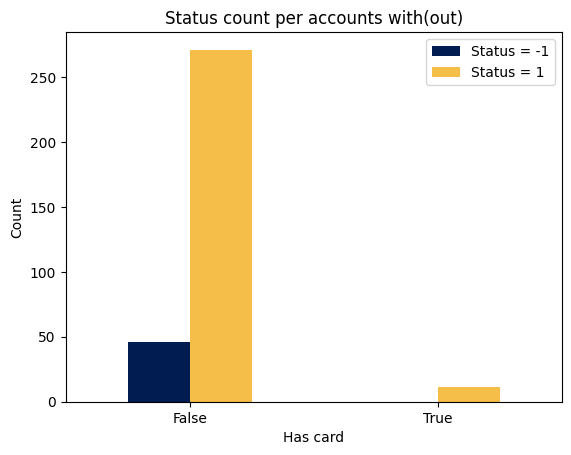

In [ ]:
df.groupby("has_card")["status"].value_counts().unstack(1).plot.bar(
    color=["#011C50", "#F5BE49"]
)

plt.ylabel("Count")
plt.xlabel("Has card")
plt.legend(["Status = -1", "Status = 1"])
plt.title("Status count per accounts with(out)")
plt.xticks(rotation=0)
plt.show()


Text(0.5, 1.0, 'Negative balance by number of accounts')

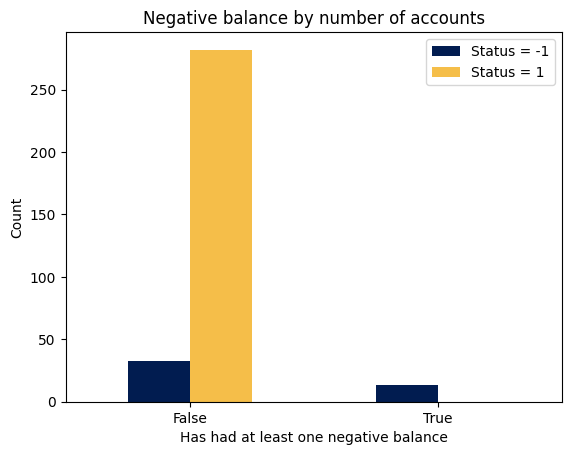

In [ ]:
df.groupby("negative_balance")["status"].value_counts().unstack(1).plot.bar(
    color=["#011C50", "#F5BE49"]
)

plt.xlabel("Has had at least one negative balance")
plt.ylabel("Count")
plt.legend(["Status = -1", "Status = 1"])
plt.xticks(rotation=0)
plt.title("Negative balance by number of accounts")


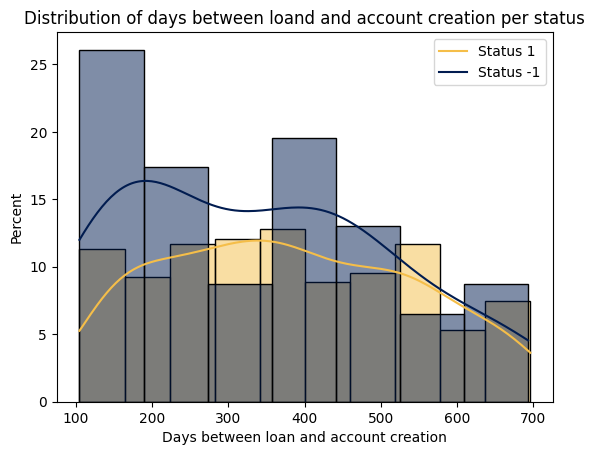

In [ ]:
sns.histplot(
    data=df[df["status"] == 1],
    x="days_between",
    color="#F5BE49",
    stat="percent",
    kde=True,
)
sns.histplot(
    data=df[df["status"] == -1],
    x="days_between",
    color="#011C50",
    stat="percent",
    kde=True,
)

plt.xlabel("Days between loan and account creation")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of days between loand and account creation per status")
plt.show()


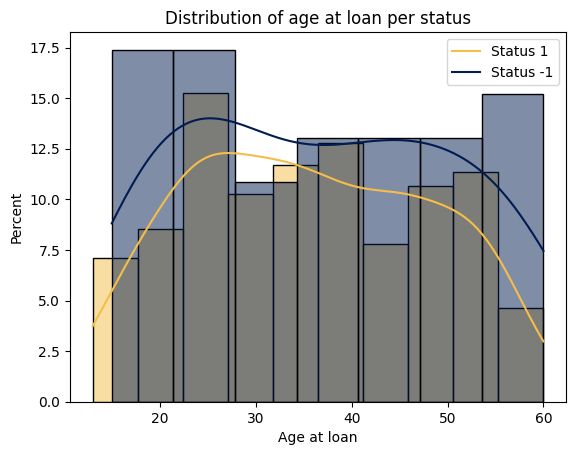

In [ ]:
sns.histplot(
    data=df[df["status"] == 1],
    x="age_at_loan",
    color="#F5BE49",
    stat="percent",
    kde=True,
)
sns.histplot(
    data=df[df["status"] == -1],
    x="age_at_loan",
    color="#011C50",
    stat="percent",
    kde=True,
)

plt.xlabel("Age at loan")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of age at loan per status")
plt.show()


Text(0.5, 1.0, "Relation between a district's salary and commited crimes")

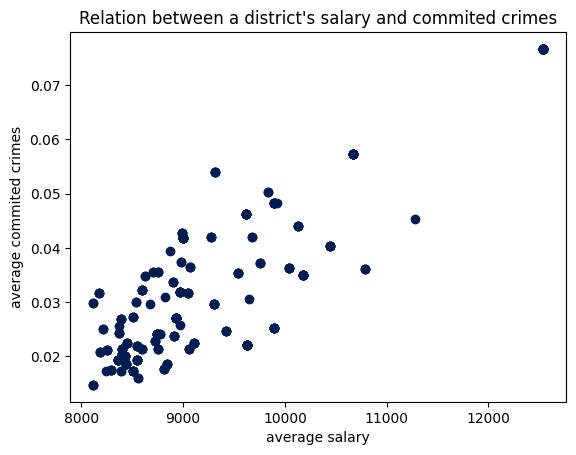

In [ ]:
plt.scatter(df["average_salary"], df["avg_commited_crimes"], color="#011C50")

plt.xlabel("average salary")
plt.ylabel("average commited crimes")
plt.title("Relation between a district's salary and commited crimes")


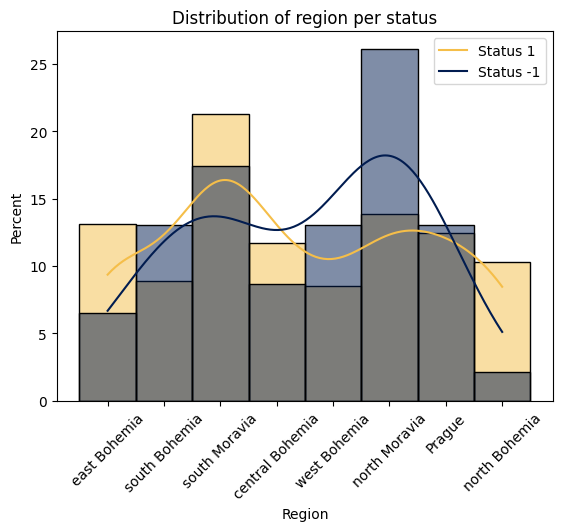

In [ ]:
sns.histplot(
    data=df[df["status"] == 1], x="region", color="#F5BE49", stat="percent", kde=True
)
sns.histplot(
    data=df[df["status"] == -1], x="region", color="#011C50", stat="percent", kde=True
)

plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of region per status")
plt.show()


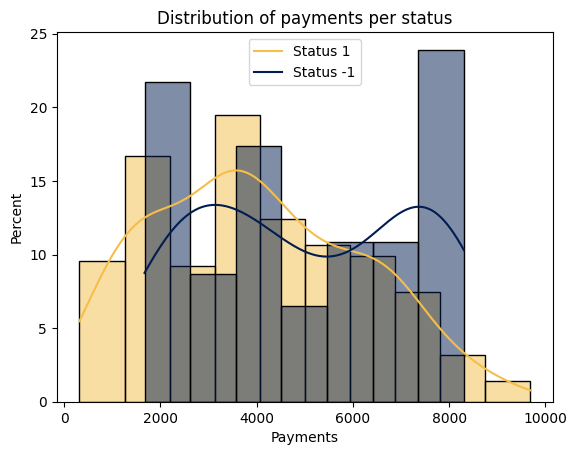

In [ ]:
sns.histplot(
    data=df[df["status"] == 1], x="payments", color="#F5BE49", stat="percent", kde=True
)
sns.histplot(
    data=df[df["status"] == -1], x="payments", color="#011C50", stat="percent", kde=True
)

plt.xlabel("Payments")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of payments per status")
plt.show()


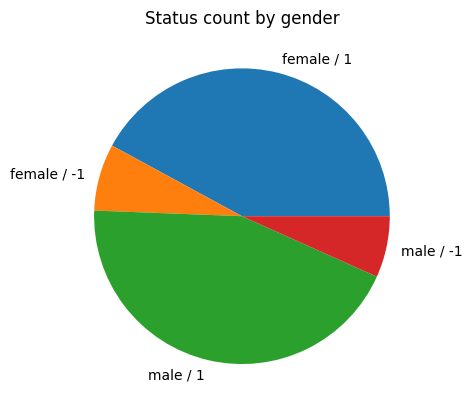

In [ ]:
values = np.array(df.groupby("gender")["status"].value_counts())
labels = ["female / 1", "female / -1", "male / 1", "male / -1"]

plt.pie(values, labels=labels)
plt.title("Status count by gender")
plt.show()


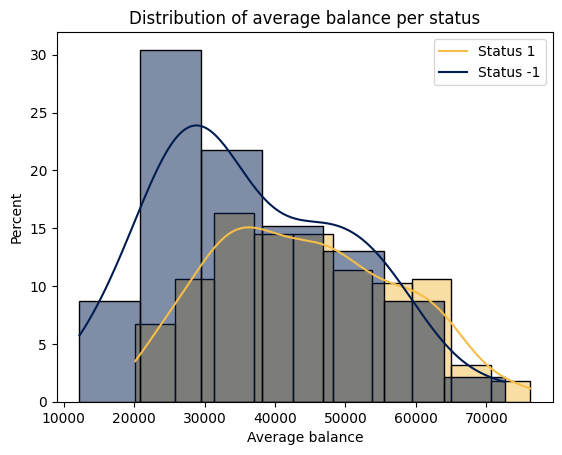

In [ ]:
sns.histplot(data=df[df['status'] == 1], x='avg_balance', color="#F5BE49", stat='percent', kde=True)
sns.histplot(data=df[df['status'] == -1], x='avg_balance', color="#011C50", stat='percent', kde=True)

plt.xlabel('Average balance')
plt.legend(['Status 1', 'Status -1'])
plt.title('Distribution of average balance per status')
plt.show()

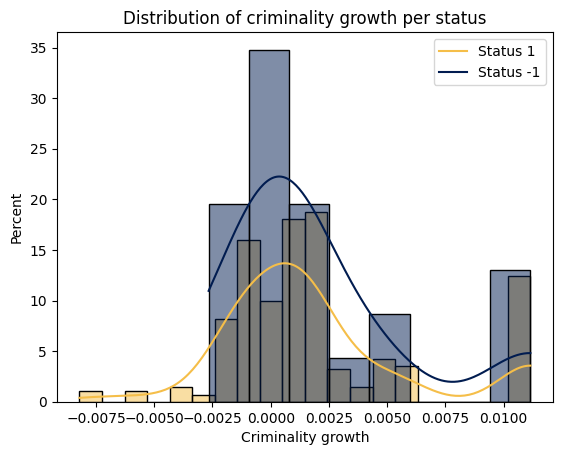

In [ ]:
sns.histplot(
    data=df[df["status"] == 1],
    x="criminality_growth",
    color="#F5BE49",
    stat="percent",
    kde=True,
)
sns.histplot(
    data=df[df["status"] == -1],
    x="criminality_growth",
    color="#011C50",
    stat="percent",
    kde=True,
)

plt.xlabel("Criminality growth")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of criminality growth per status")
plt.show()


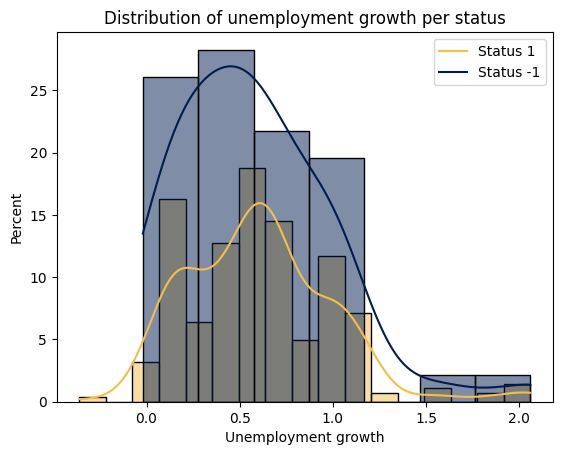

In [ ]:
sns.histplot(
    data=df[df["status"] == 1],
    x="unemployment_growth",
    color="#F5BE49",
    stat="percent",
    kde=True,
)
sns.histplot(
    data=df[df["status"] == -1],
    x="unemployment_growth",
    color="#011C50",
    stat="percent",
    kde=True,
)

plt.xlabel("Unemployment growth")
plt.legend(["Status 1", "Status -1"])
plt.title("Distribution of unemployment growth per status")
plt.show()


<AxesSubplot: title={'center': 'credit_ratio'}, xlabel='status'>

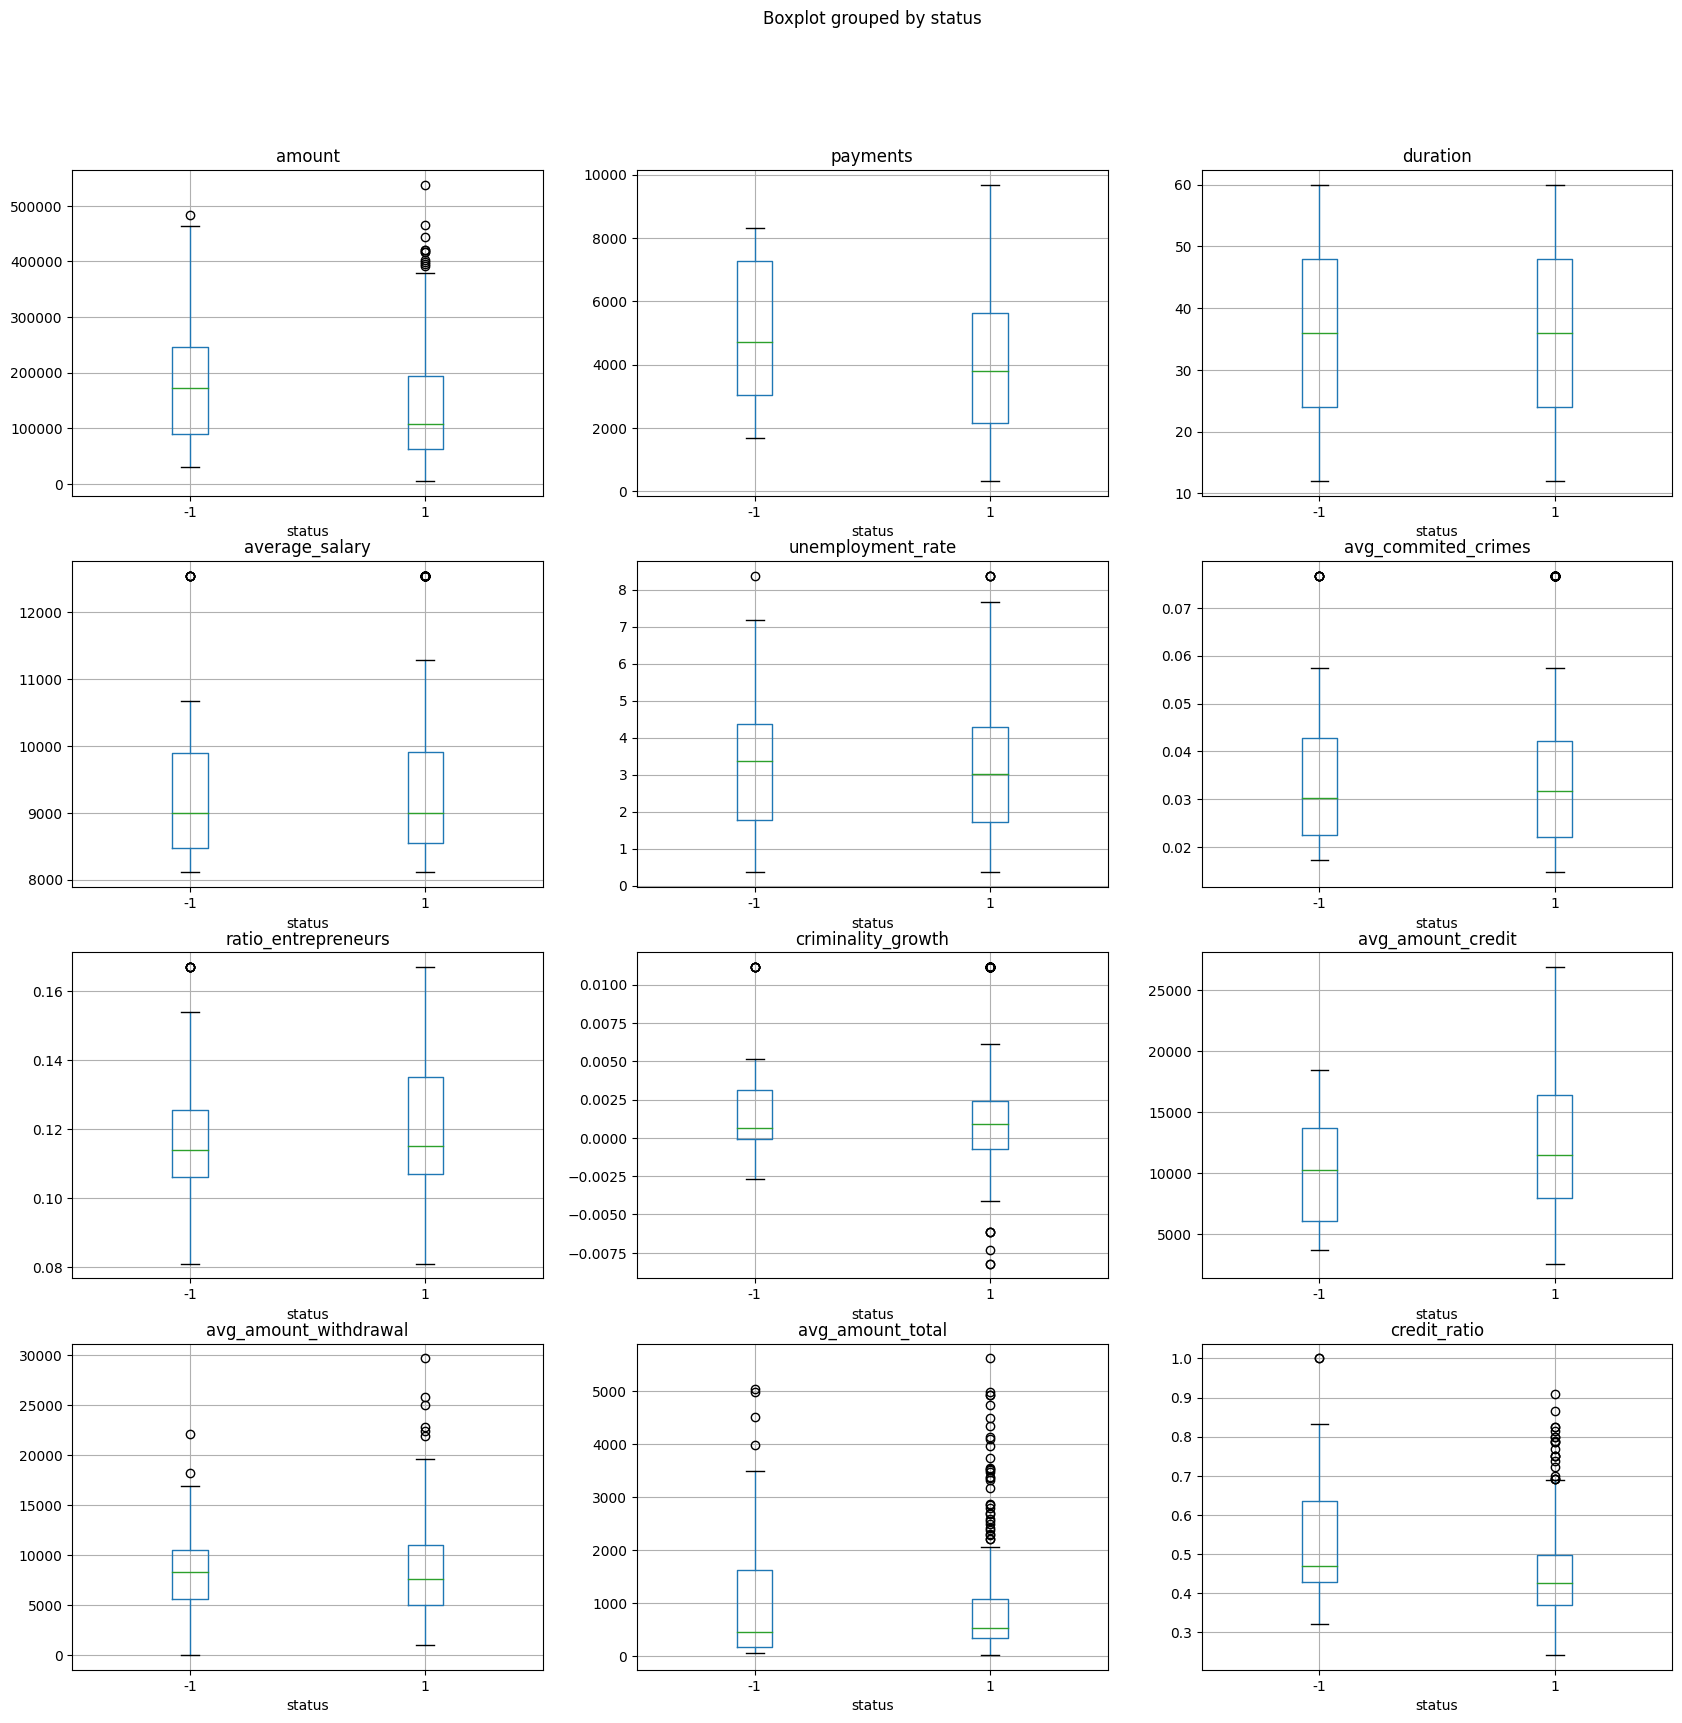

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

df.boxplot(column="amount", by="status", figsize=(5, 5), ax=axs[0][0])
df.boxplot(column="payments", by="status", figsize=(5, 5), ax=axs[0][1])
df.boxplot(column="duration", by="status", figsize=(5, 5), ax=axs[0][2])
df.boxplot(column="average_salary", by="status", figsize=(5, 5), ax=axs[1][0])
df.boxplot(column="unemployment_rate", by="status", figsize=(5, 5), ax=axs[1][1])
df.boxplot(column="avg_commited_crimes", by="status", figsize=(5, 5), ax=axs[1][2])
df.boxplot(column="ratio_entrepreneurs", by="status", figsize=(5, 5), ax=axs[2][0])
df.boxplot(column="criminality_growth", by="status", figsize=(5, 5), ax=axs[2][1])
df.boxplot(column="avg_amount_credit", by="status", figsize=(5, 5), ax=axs[2][2])
df.boxplot(column="avg_amount_withdrawal", by="status", figsize=(5, 5), ax=axs[3][0])
df.boxplot(column="avg_amount_total", by="status", figsize=(5, 5), ax=axs[3][1])
df.boxplot(column="credit_ratio", by="status", figsize=(5, 5), ax=axs[3][2])


<AxesSubplot: title={'center': 'days_between'}, xlabel='status'>

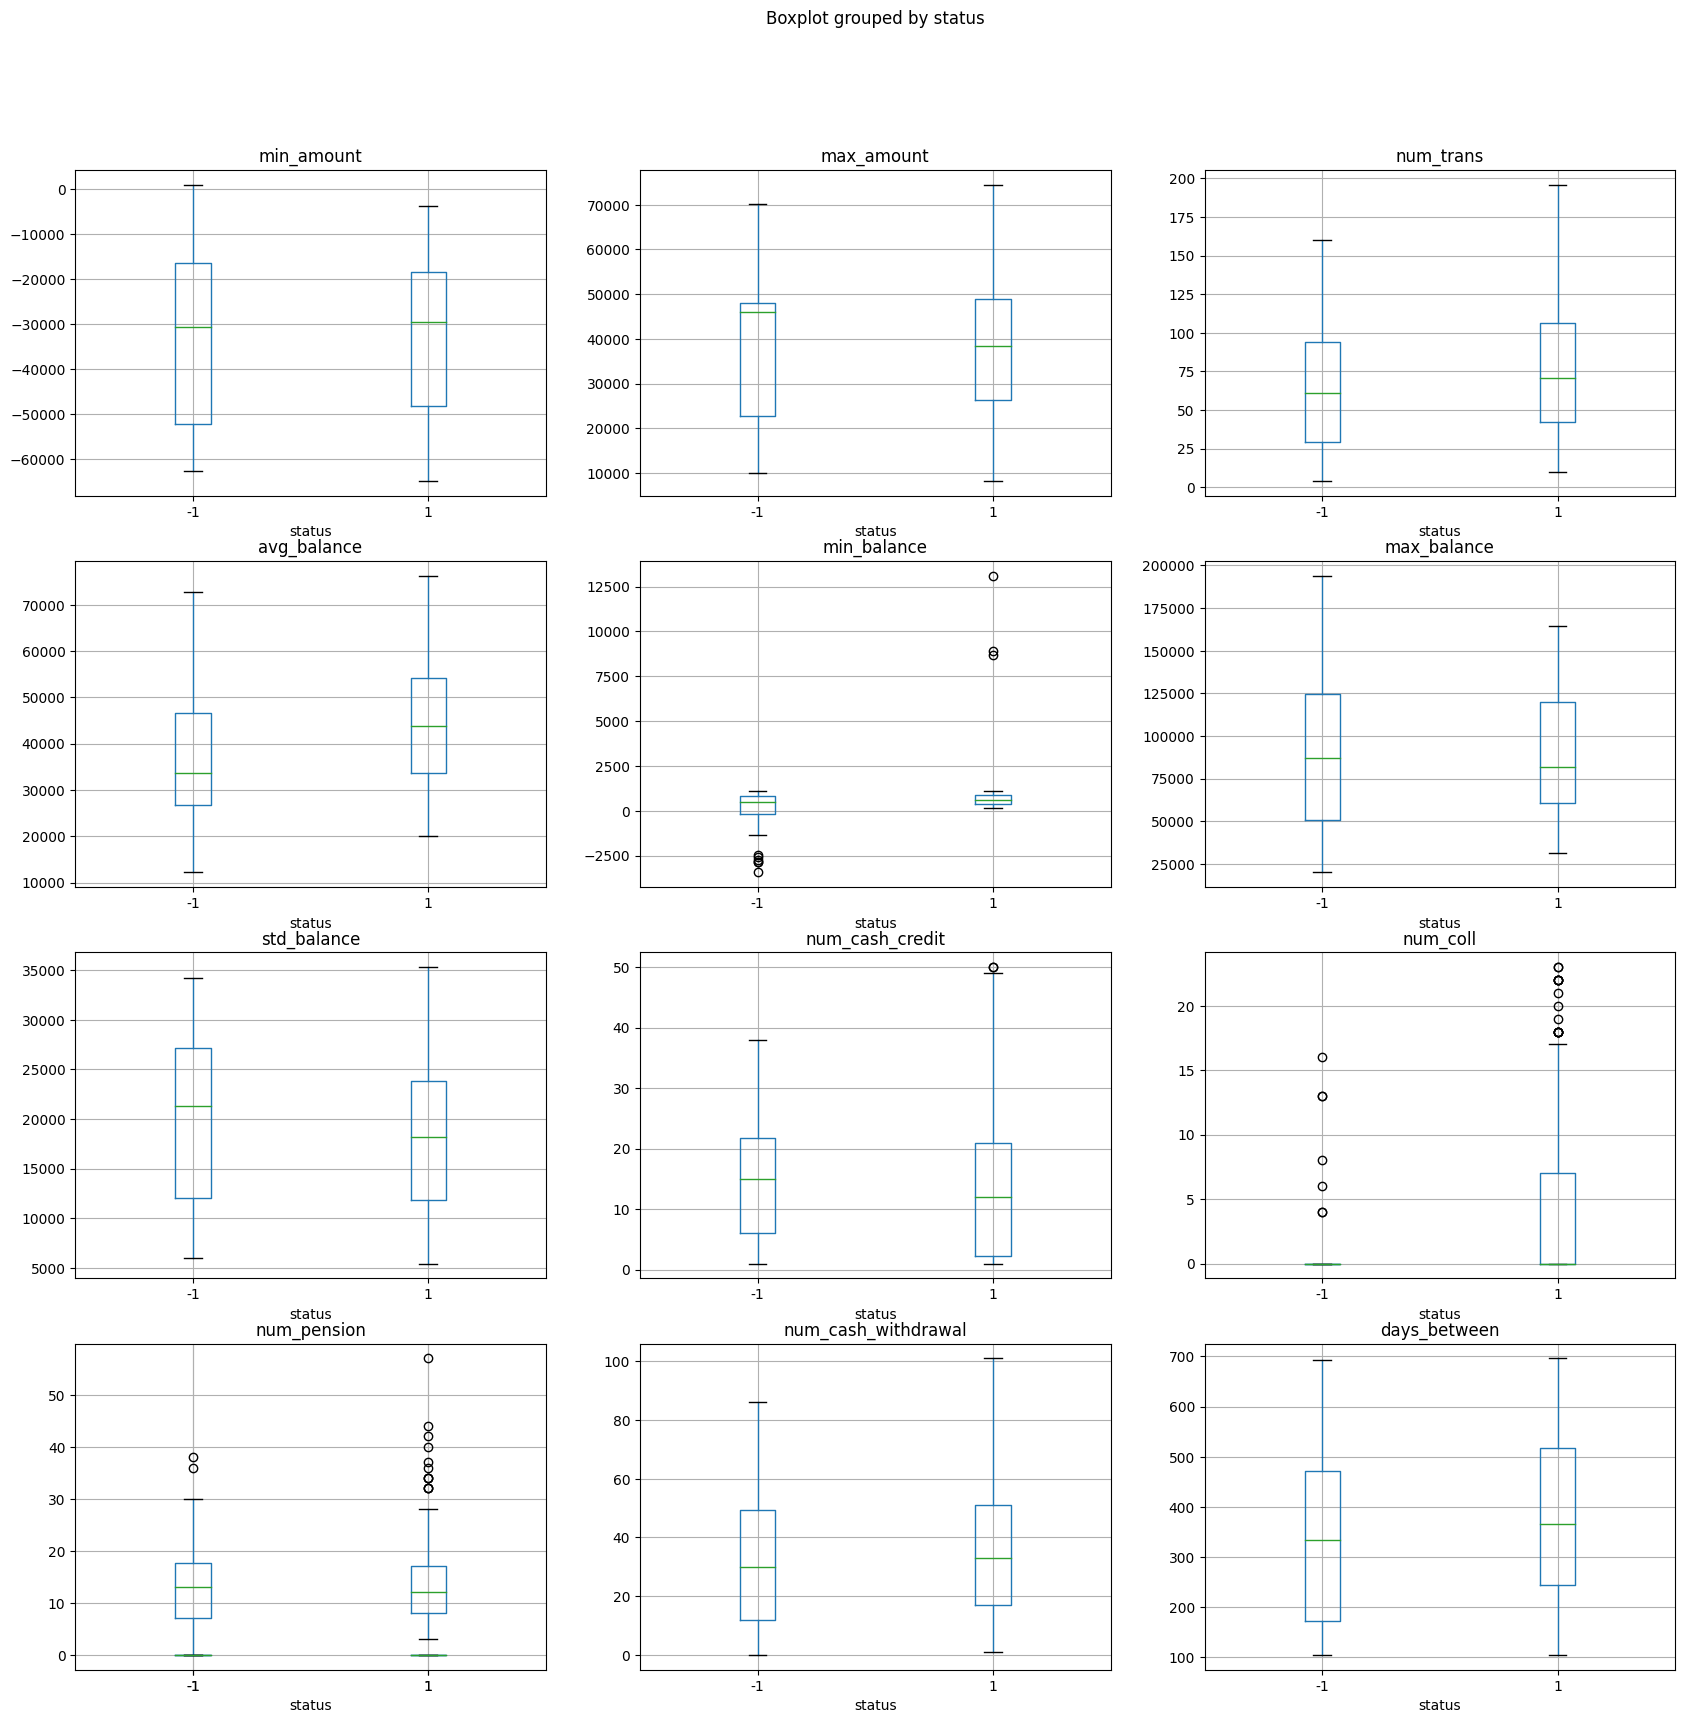

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

df.boxplot(column="min_amount", by="status", figsize=(5, 5), ax=axs[0][0])
df.boxplot(column="max_amount", by="status", figsize=(5, 5), ax=axs[0][1])
df.boxplot(column="num_trans", by="status", figsize=(5, 5), ax=axs[0][2])
df.boxplot(column="avg_balance", by="status", figsize=(5, 5), ax=axs[1][0])
df.boxplot(column="min_balance", by="status", figsize=(5, 5), ax=axs[1][1])
df.boxplot(column="max_balance", by="status", figsize=(5, 5), ax=axs[1][2])
df.boxplot(column="std_balance", by="status", figsize=(5, 5), ax=axs[2][0])
df.boxplot(column="num_cash_credit", by="status", figsize=(5, 5), ax=axs[2][1])
df.boxplot(column="num_coll", by="status", figsize=(5, 5), ax=axs[2][2])
df.boxplot(column="num_interest", by="status", figsize=(5, 5), ax=axs[3][0])
df.boxplot(column="num_pension", by="status", figsize=(5, 5), ax=axs[3][0])
df.boxplot(column="num_cash_withdrawal", by="status", figsize=(5, 5), ax=axs[3][1])
df.boxplot(column="days_between", by="status", figsize=(5, 5), ax=axs[3][2])


<AxesSubplot: title={'center': 'days_between'}, xlabel='status'>

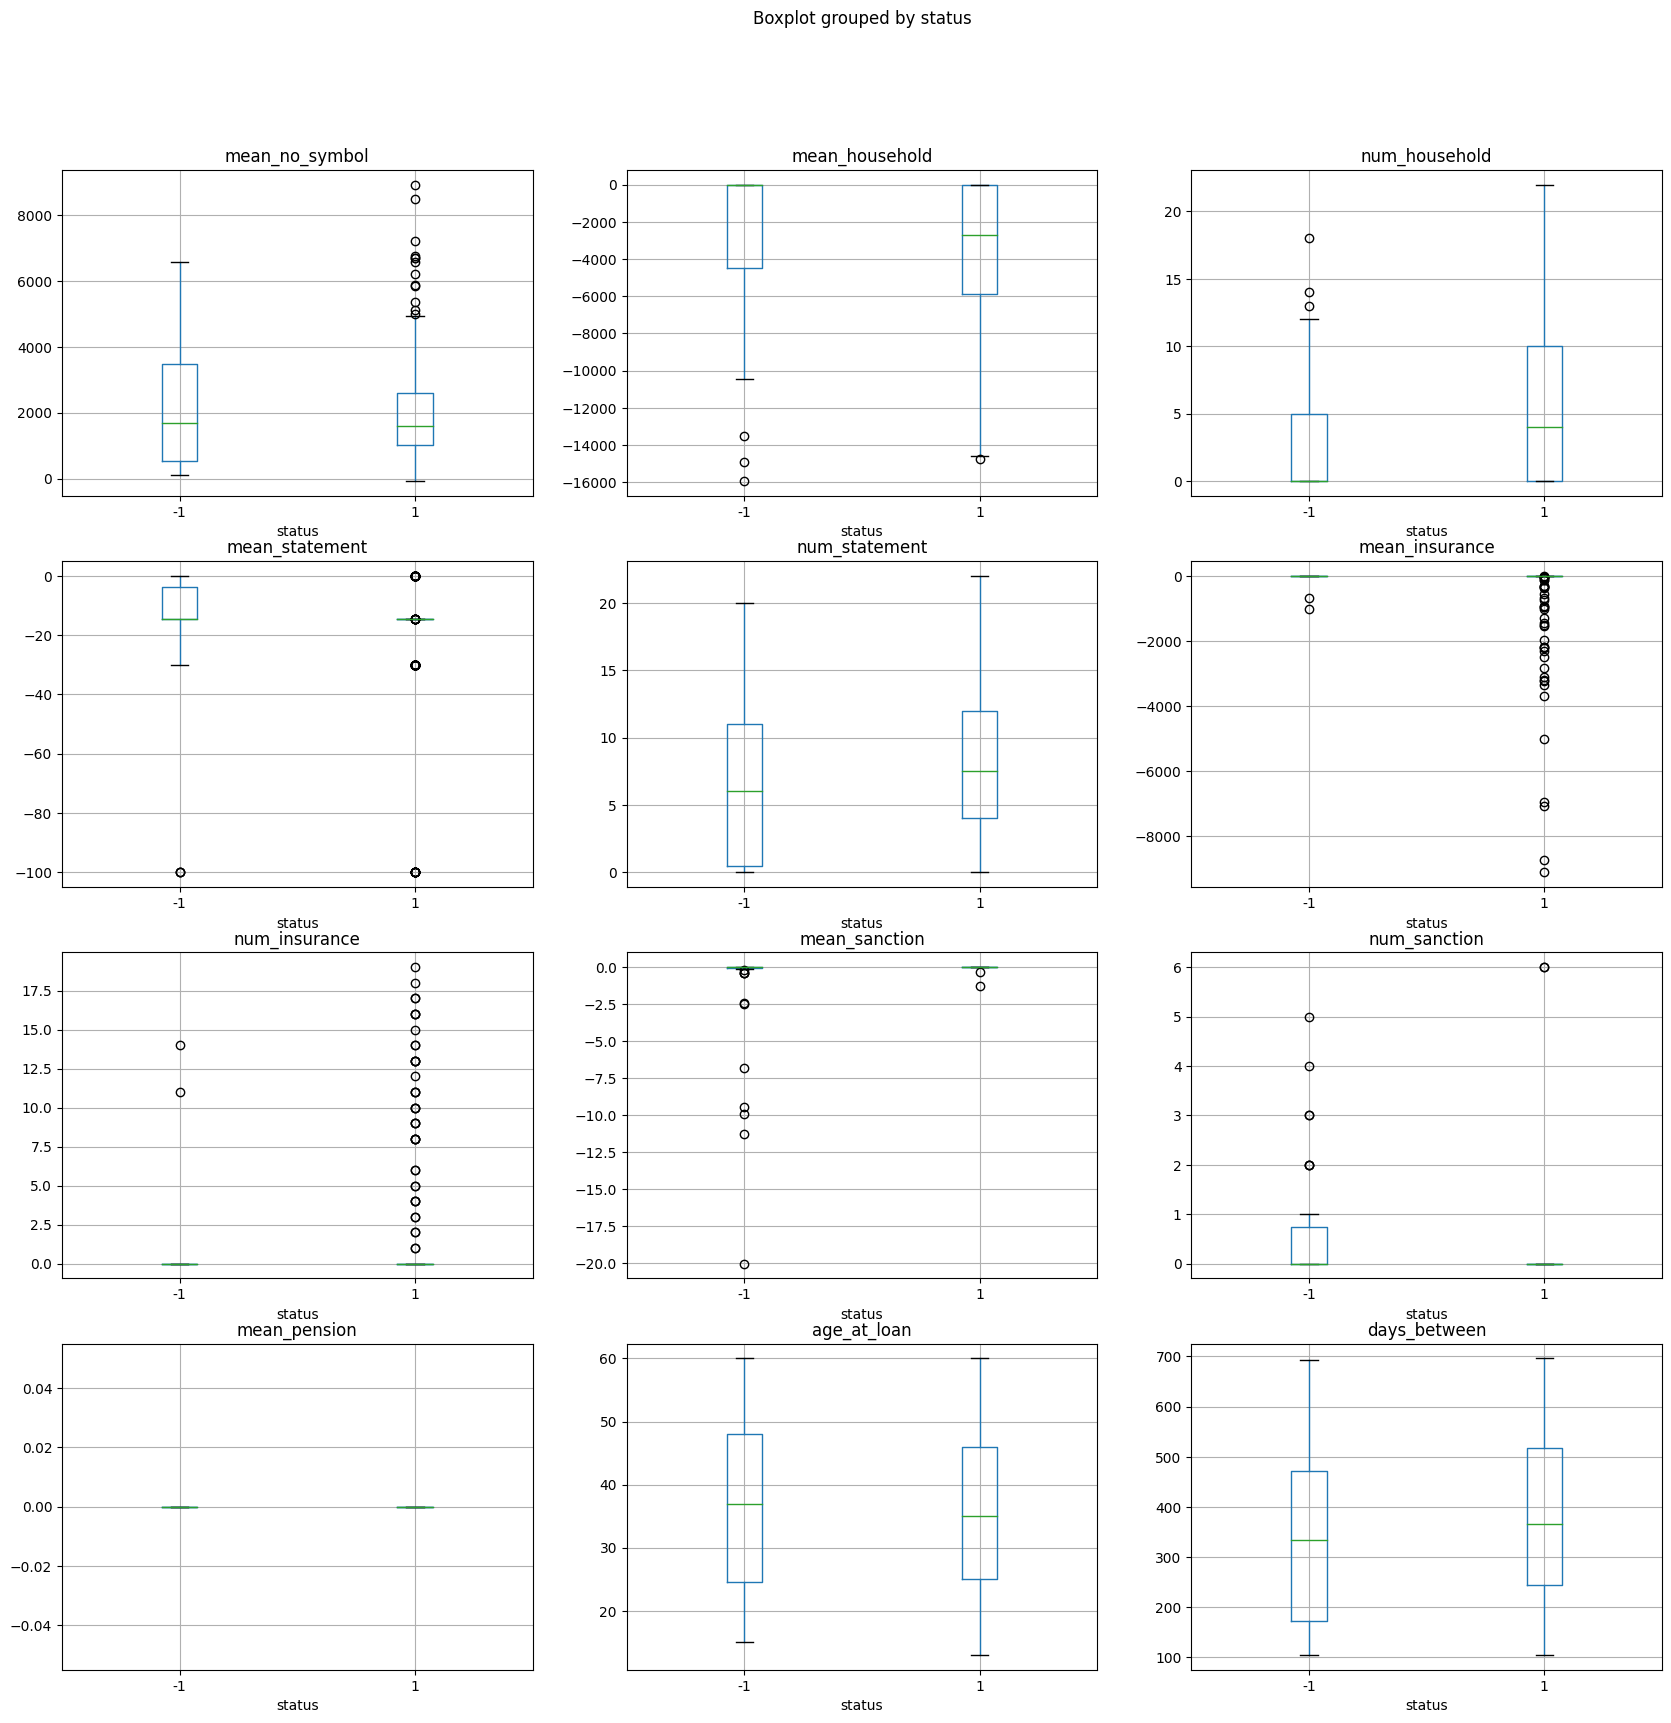

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

df.boxplot(column="mean_no_symbol", by="status", figsize=(5, 5), ax=axs[0][0])
df.boxplot(column="mean_household", by="status", figsize=(5, 5), ax=axs[0][1])
df.boxplot(column="num_household", by="status", figsize=(5, 5), ax=axs[0][2])
df.boxplot(column="mean_statement", by="status", figsize=(5, 5), ax=axs[1][0])
df.boxplot(column="num_statement", by="status", figsize=(5, 5), ax=axs[1][1])
df.boxplot(column="mean_insurance", by="status", figsize=(5, 5), ax=axs[1][2])
df.boxplot(column="num_insurance", by="status", figsize=(5, 5), ax=axs[2][0])
df.boxplot(column="mean_sanction", by="status", figsize=(5, 5), ax=axs[2][1])
df.boxplot(column="num_sanction", by="status", figsize=(5, 5), ax=axs[2][2])
df.boxplot(column="mean_pension", by="status", figsize=(5, 5), ax=axs[3][0])
df.boxplot(column="age_at_loan", by="status", figsize=(5, 5), ax=axs[3][1])
df.boxplot(column="days_between", by="status", figsize=(5, 5), ax=axs[3][2])


In [ ]:
df.columns


Index(['loan_id', 'account_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'account_district_id', 'frequency', 'creation_date',
       'disp_id', 'client_id', 'has_disponent', 'client_district_id', 'gender',
       'birth_date', 'code', 'region', 'no._of_inhabitants',
       'no._of_municipalities_with_inhabitants_<_499',
       'no._of_municipalities_with_inhabitants_500-1999',
       'no._of_municipalities_with_inhabitants_2000-9999',
       'no._of_municipalities_with_inhabitants_>10000', 'no._of_cities',
       'ratio_of_urban_inhabitants', 'average_salary', 'unemployment_rate',
       'avg_commited_crimes', 'ratio_entrepreneurs', 'criminality_growth',
       'unemployment_growth', 'avg_amount_credit', 'avg_amount_withdrawal',
       'avg_amount_total', 'min_amount', 'max_amount', 'credit_ratio',
       'num_trans', 'avg_balance', 'min_balance', 'max_balance', 'std_balance',
       'negative_balance', 'last_balance_negative', 'num_cash_credit',
       'num_coll